# 数据分析

1. 学习如何对数据集整体概况进行分析，包括数据集的基本情况（缺失值，异常值）

2. 学习了解变量间的相互关系、变量与预测值之间的存在关系

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")
testA = pd.read_csv("testA.csv")
print("successful!")
print('train.shape',train.shape)
print("testA.shape",testA.shape)

successful!
train.shape (800000, 47)
testA.shape (200000, 46)


###### 分块读取的意义
trin_1 = pd.read_csv("train.csv",nrows=5)
print("train_1.shape",trin_1.shape)

###### 设置chunksize参数，来控制每次迭代数据的大小
chunker = pd.read_csv("./train.csv",chunksize=5)
for item in chunker:
    print(type(item))
    #<class 'pandas.core.frame.DataFrame'>
    print(len(item))
    #5

In [3]:
#print(train.columns)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

## 变量含义说明
![](变量说明.jpg)

In [4]:
train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252015,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


###### 可以看出其实describe()有个问题就是只能显示数字类型的数据

In [5]:
#显示头尾5个
train.head(5).append(train.tail(5))

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0
799995,799995,25000.0,3,14.49,860.41,C,C4,2659.0,7 years,1,...,6.0,2.0,12.0,13.0,10.0,14.0,0.0,0.0,0.0,3.0
799996,799996,17000.0,3,7.90,531.94,A,A4,29205.0,10+ years,0,...,15.0,16.0,2.0,19.0,2.0,7.0,0.0,0.0,0.0,0.0
799997,799997,6000.0,3,13.33,203.12,C,C3,2582.0,10+ years,1,...,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,799998,19200.0,3,6.92,592.14,A,A4,151.0,10+ years,0,...,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0
799999,799999,9000.0,3,11.06,294.91,B,B3,13.0,5 years,0,...,3.0,4.0,4.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0


## 查看数据集中特征缺失值，唯一值等

In [6]:
#print(train.isnull().any().sum)
#print(f'There are {train.isnull().any().sum()} columns in train dataset with missing values.')

In [7]:
print(train.isnull().sum())

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
policyCode                0
n0                    40270
n1                    40270
n2                    40270
n3                  

###### 上面可以看到bound 的有22个true，上面得到训练集有22列特征有缺失值，进一步查看缺失特征中缺失率大于5%的特征
###### 所以真正缺失严重的是n系列的值（情有可原） employmentLength ？这个信息为啥会缺失率这么高？

{'id': 0.0, 'loanAmnt': 0.0, 'term': 0.0, 'interestRate': 0.0, 'installment': 0.0, 'grade': 0.0, 'subGrade': 0.0, 'employmentTitle': 1.25e-06, 'employmentLength': 0.05849875, 'homeOwnership': 0.0, 'annualIncome': 0.0, 'verificationStatus': 0.0, 'issueDate': 0.0, 'isDefault': 0.0, 'purpose': 0.0, 'postCode': 1.25e-06, 'regionCode': 0.0, 'dti': 0.00029875, 'delinquency_2years': 0.0, 'ficoRangeLow': 0.0, 'ficoRangeHigh': 0.0, 'openAcc': 0.0, 'pubRec': 0.0, 'pubRecBankruptcies': 0.00050625, 'revolBal': 0.0, 'revolUtil': 0.00066375, 'totalAcc': 0.0, 'initialListStatus': 0.0, 'applicationType': 0.0, 'earliesCreditLine': 0.0, 'title': 1.25e-06, 'policyCode': 0.0, 'n0': 0.0503375, 'n1': 0.0503375, 'n2': 0.0503375, 'n3': 0.0503375, 'n4': 0.04154875, 'n5': 0.0503375, 'n6': 0.0503375, 'n7': 0.0503375, 'n8': 0.05033875, 'n9': 0.0503375, 'n10': 0.04154875, 'n11': 0.08719, 'n12': 0.0503375, 'n13': 0.0503375, 'n14': 0.0503375}


<AxesSubplot:>

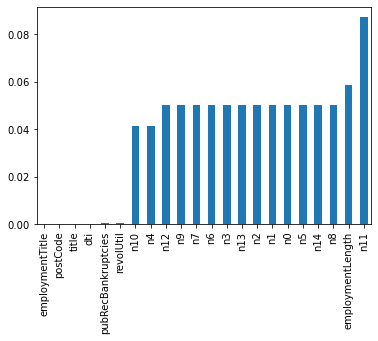

In [8]:
#很明显就是构建了字典！
print((train.isnull().sum()/len(train)).to_dict())

have_null_fea_dict = (train.isnull().sum()/len(train)).to_dict()
fea_null_moreThanHalf = {}
for key,value in have_null_fea_dict.items():
    if value > 0.5:
        fea_null_moreThanHalf[key] = value

#for key,valuea in fea_null_moreThanHalf:
#    print(fea_null_moreThanHalf[key],value)

# nan可视化
missing = train.isnull().sum()/len(train)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

* 纵向了解哪些列存在 “nan”, 并可以把nan的个数打印，主要的目的在于查看某一列nan存在的个数是否真的很大，如果nan存在的过多，说明这一列对label的影响几乎不起作用了，可以考虑删掉。如果缺失值很小一般可以选择填充。
* 另外可以横向比较，如果在数据集中，某些样本数据的大部分列都是缺失的且样本足够的情况下可以考虑删除。

###### 要将单值特征进行筛选分离、特殊处理？

In [9]:
one_value_fea = [col for col in train.columns if train[col].nunique() <= 1]
one_value_fea_test = [col for col in testA.columns if testA[col].nunique() <= 1]

In [10]:
one_value_fea

['policyCode']

In [10]:
one_value_fea_test

['policyCode']

In [11]:
print(f'There are {len(one_value_fea)} columns in train dataset with one unique value.')
print(f'There are {len(one_value_fea_test)} columns in test dataset with one unique value.')

There are 1 columns in train dataset with one unique value.
There are 1 columns in test dataset with one unique value.


## 总结

* 47列数据中有22列都缺少数据，这在现实世界中很正常。‘policyCode’具有一个唯一值（或全部缺失）。有很多连续变量和一些分类变量。

## 特征变量的类型（这个对研究也有影响！）
* 特征一般都是由类别型特征和数值型特征组成，而数值型特征又分为连续型和离散型。
* 类别型特征有时具有非数值关系，有时也具有数值关系。比如‘grade’中的等级A，B，C等，是否只是单纯的分类，还是A优于其他要结合业务判断。
* 数值型特征本是可以直接入模的，但往往风控人员要对其做分箱，转化为WOE编码进而做标准评分卡等操作。从模型效果上来看，特征分箱主要是为了降低变量的复杂性，减少变量噪音对模型的影响，提高自变量和因变量的相关度。从而使模型更加稳定。

In [12]:
numerical_fea = list(train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(train.columns)))

In [13]:
print(numerical_fea)

['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'employmentTitle', 'homeOwnership', 'annualIncome', 'verificationStatus', 'isDefault', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']


In [14]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [15]:
#过滤数值型类别特征
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(train,numerical_fea)

In [16]:
print(numerical_serial_fea)

['id', 'loanAmnt', 'interestRate', 'installment', 'employmentTitle', 'annualIncome', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'title', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n13', 'n14']


In [17]:
print(numerical_noserial_fea)

['term', 'homeOwnership', 'verificationStatus', 'isDefault', 'initialListStatus', 'applicationType', 'policyCode', 'n11', 'n12']


###### 你可以对所有离散的数据变量和连续的数据变量进行分析。离散可以看出每个值的个数、连续的可以看出其分布的状况

In [18]:
import seaborn as sns

D:\Programmingcode\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programmingcode\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programmingcode\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

D:\Programmingcode\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programmingcode\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programmingcode\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

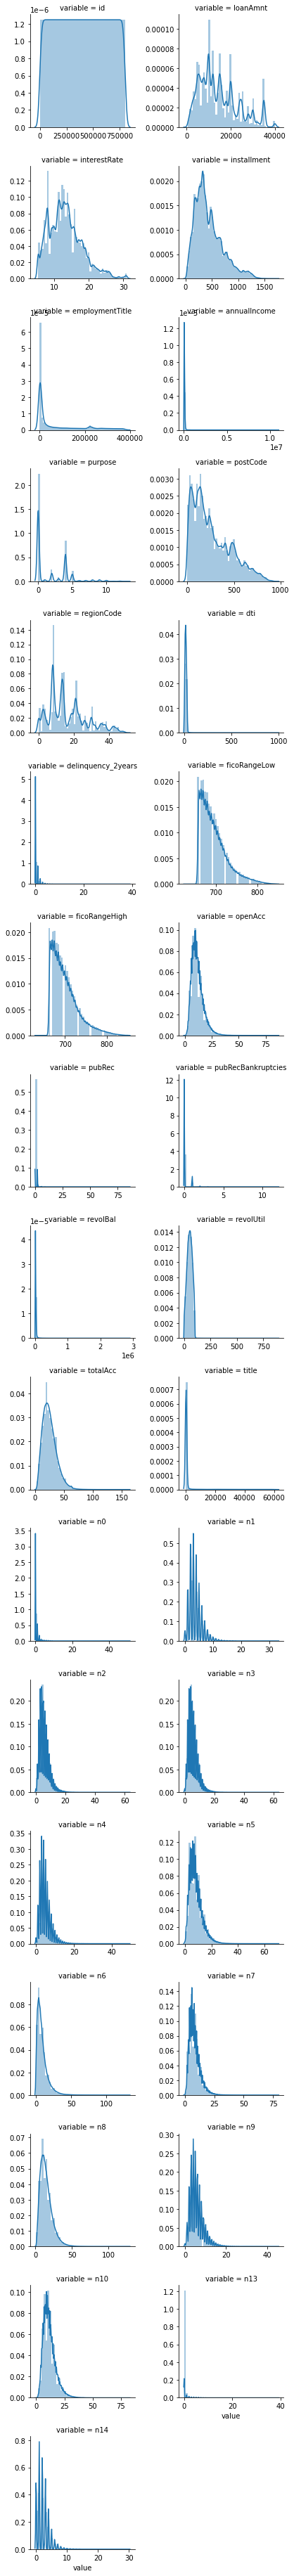

In [19]:
# 每个连续数字特征得分布可视化
f = pd.melt(train, value_vars=numerical_serial_fea)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
#g = g.map(sns.distplot, "value")
g = g.map(sns.distplot, "value")

* 查看某一个数值型变量的分布，查看变量是否符合正态分布，如果不符合正太分布的变量可以log化后再观察下是否符合正态分布
* 如果想统一处理一批数据变标准化 必须把这些之前已经正态化的数据提出
* 正态化的原因：一些情况下正态非正态可以让模型更快的收敛，一些模型要求数据正态（eg. GMM、KNN）,保证数据不要过偏态即可，过于偏态可能会影响模型预测结果。

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'Probability')

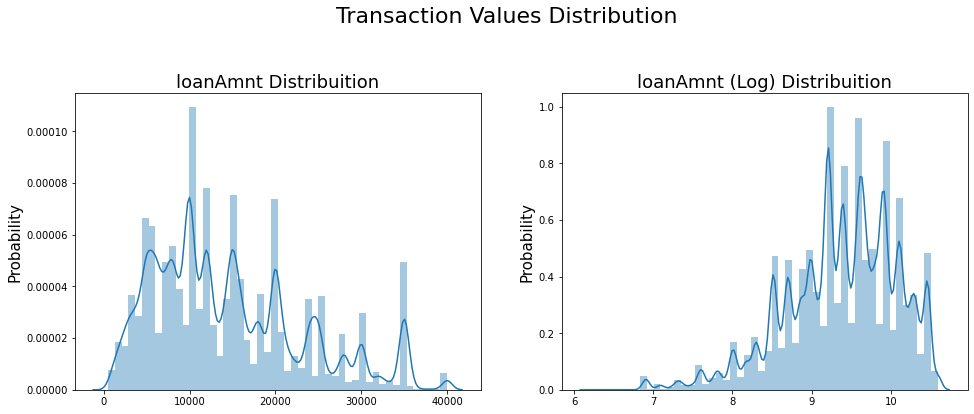

In [21]:
#Ploting Transaction Amount Values Distribution
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Values Distribution', fontsize=22)
plt.subplot(221)
sub_plot_1 = sns.distplot(train['loanAmnt'])
sub_plot_1.set_title("loanAmnt Distribuition", fontsize=18)
sub_plot_1.set_xlabel("")
sub_plot_1.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
sub_plot_2 = sns.distplot(np.log(train['loanAmnt']))
sub_plot_2.set_title("loanAmnt (Log) Distribuition", fontsize=18)
sub_plot_2.set_xlabel("")
sub_plot_2.set_ylabel("Probability", fontsize=15)

## 变量自身的分布状态

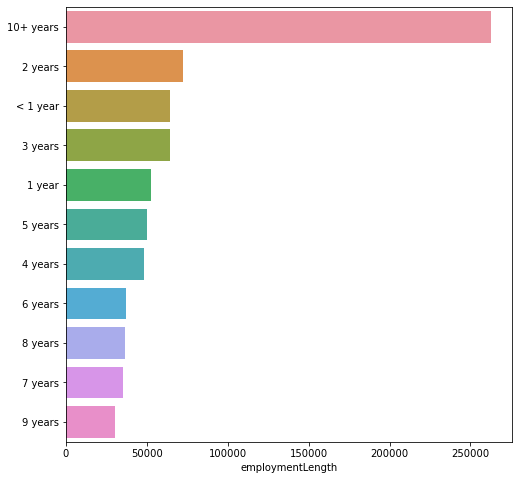

In [22]:
plt.figure(figsize=(8, 8))
sns.barplot(train["employmentLength"].value_counts(dropna=False)[:20],
            train["employmentLength"].value_counts(dropna=False).keys()[:20])
plt.show()

##### 根绝y值不同可视化x某个特征的分布

###### 查看类别型变量在不同y值上的分布

In [23]:
train_loan_fr = train.loc[train['isDefault'] == 1]
train_loan_nofr = train.loc[train['isDefault'] == 0]

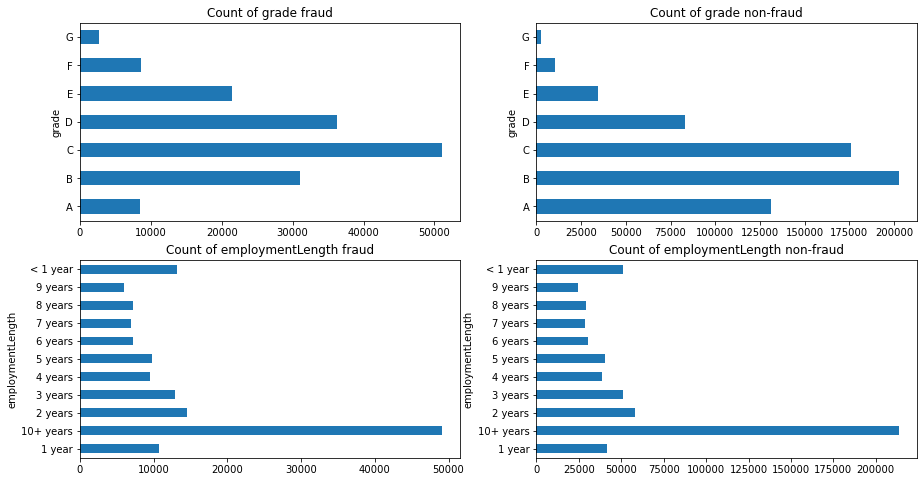

In [24]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
train_loan_fr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax1, title='grade fraud')
train_loan_nofr.groupby('grade')['grade'].count().plot(kind='barh', ax=ax2, title='grade non-fraud')
train_loan_fr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax3, title='employmentLength fraud')
train_loan_nofr.groupby('employmentLength')['employmentLength'].count().plot(kind='barh', ax=ax4, title='employmentLength non-fraud')
plt.show()

<AxesSubplot:title={'center':'Log Loan Amt - Not Fraud'}, ylabel='Frequency'>

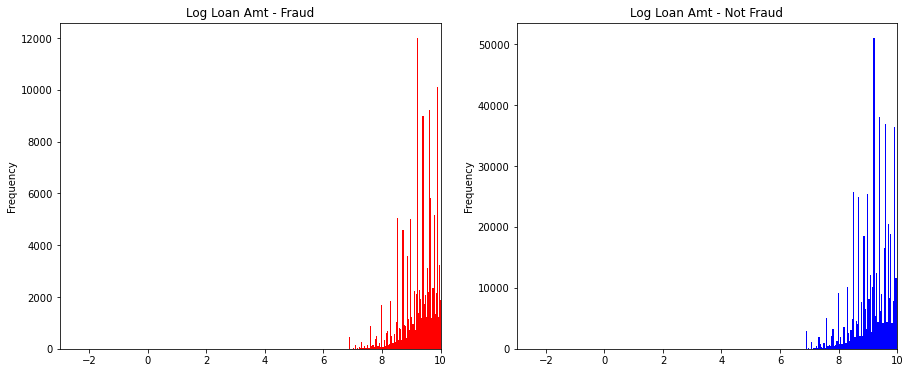

In [25]:
# 查看连续型变量在不同y值上的分布

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 6))
train.loc[train['isDefault'] == 1] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Fraud',
          color='r',
          xlim=(-3, 10),
         ax= ax1)
train.loc[train['isDefault'] == 0] \
    ['loanAmnt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log Loan Amt - Not Fraud',
          color='b',
          xlim=(-3, 10),
         ax=ax2)

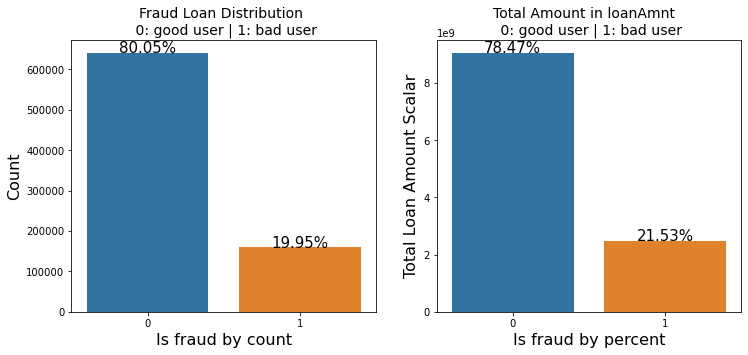

In [26]:
total = len(train)
total_amt = train.groupby(['isDefault'])['loanAmnt'].sum().sum()
plt.figure(figsize=(12,5))
plt.subplot(121)##1代表行，2代表列，所以一共有2个图，1代表此时绘制第一个图。
plot_tr = sns.countplot(x='isDefault',data=train)#data_train‘isDefault’这个特征每种类别的数量**
plot_tr.set_title("Fraud Loan Distribution \n 0: good user | 1: bad user", fontsize=14)
plot_tr.set_xlabel("Is fraud by count", fontsize=16)
plot_tr.set_ylabel('Count', fontsize=16)
for p in plot_tr.patches:
    height = p.get_height()
    plot_tr.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
    
percent_amt = (train.groupby(['isDefault'])['loanAmnt'].sum())
percent_amt = percent_amt.reset_index()
plt.subplot(122)
plot_tr_2 = sns.barplot(x='isDefault', y='loanAmnt',  dodge=True, data=percent_amt)
plot_tr_2.set_title("Total Amount in loanAmnt  \n 0: good user | 1: bad user", fontsize=14)
plot_tr_2.set_xlabel("Is fraud by percent", fontsize=16)
plot_tr_2.set_ylabel('Total Loan Amount Scalar', fontsize=16)
for p in plot_tr_2.patches:
    height = p.get_height()
    plot_tr_2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_amt * 100),
            ha="center", fontsize=15)     

## 时间格式查看
###### 这个有可能出现时间序列的话，那需要按照时间序列来进行分割

In [27]:
import datetime

In [28]:
#转化成时间格式  issueDateDT特征表示数据日期离数据集中日期最早的日期（2007-06-01）的天数

train['issueDate'] = pd.to_datetime(train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
train['issueDateDT'] = train['issueDate'].apply(lambda x: x-startdate).dt.days

In [29]:
#转化成时间格式

testA['issueDate'] = pd.to_datetime(train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
testA['issueDateDT'] = testA['issueDate'].apply(lambda x: x-startdate).dt.days

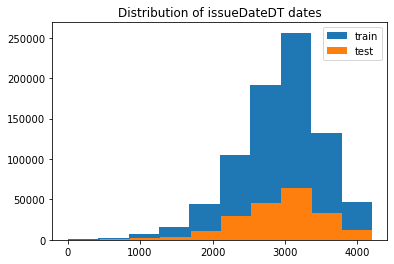

In [30]:
plt.hist(train['issueDateDT'], label='train');
plt.hist(testA['issueDateDT'], label='test');
plt.legend();
plt.title('Distribution of issueDateDT dates');
#train 和 test issueDateDT 日期有重叠 所以使用基于时间的分割进行验证是不明智的

In [31]:
#透视图 索引可以有多个，“columns（列）”是可选的，聚合函数aggfunc最后是被应用到了变量“values”中你所列举的项目上。
pivot = pd.pivot_table(train, index=['grade'], columns=['issueDateDT'], values=['loanAmnt'], aggfunc=np.sum)

##### 生成网页视图

In [35]:
import pandas_profiling

In [36]:
pfr = pandas_profiling.ProfileReport(train)
pfr.to_file("./example.html")

# 数据处理

In [1]:
import os
import json
import gc
from numba import jit
from tqdm import tqdm_notebook
from tqdm import tqdm
import lightgbm as lgb
import catboost as cbt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler as std
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import f1_score
import time
import datetime 
from datetime import datetime, timedelta
import gc
from scipy.signal import hilbert
from scipy.signal import hann
from scipy.signal import convolve
from scipy import stats
import scipy.spatial.distance as dist
from collections import Counter 
from statistics import mode 
import warnings
warnings.filterwarnings("ignore")
import json 
import math
from itertools import product
import ast
from sklearn.model_selection import train_test_split #数据分隔出训练集和验证集
import lightgbm as lgb
import numpy as np 
import pandas as pd
#导入精度和召回
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import lightgbm as lgb

import seaborn as sns
pd.set_option('display.max_columns',None)
# %matplotlib inline

## 读取数据并对数据进行合并

In [2]:
# 读入数据
train_data = pd.read_csv(r'E:\CODE\ProgrammingProgect\pythoncoding\基于数据分析的金融风控预测（毕业设计）\baseline\train.csv',encoding = "gbk")

test_data = pd.read_csv(r'E:\CODE\ProgrammingProgect\pythoncoding\基于数据分析的金融风控预测（毕业设计）\baseline\testA.csv',encoding = "gbk")

target=train_data['isDefault']             #label
train_data=train_data.drop(['isDefault'],axis=1)

data=pd.concat([train_data,test_data])  #合并数据

是直接把训练集和测试集先合并到一起，然后统一处理其中的数据。
可以很明显的看到，这个数据集中有三种不同类型的数据变量。
我们需要对这三种不同类型的数据分别进行处理。
train_data (800000,46)
test_data (200000,46)
target (800000,) 这个是01标签
data (1000000,46)
从变量说明中我们可以知道只有在训练集中。给了80万个结果。
而对于测试集的结果并没有给我们而是通过测试的方式。来评价我们的模型。

In [3]:
data.info()
data.isnull().sum() #查看失值

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 199999
Data columns (total 46 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  int64  
 1   loanAmnt            1000000 non-null  float64
 2   term                1000000 non-null  int64  
 3   interestRate        1000000 non-null  float64
 4   installment         1000000 non-null  float64
 5   grade               1000000 non-null  object 
 6   subGrade            1000000 non-null  object 
 7   employmentTitle     999999 non-null   float64
 8   employmentLength    941459 non-null   object 
 9   homeOwnership       1000000 non-null  int64  
 10  annualIncome        1000000 non-null  float64
 11  verificationStatus  1000000 non-null  int64  
 12  issueDate           1000000 non-null  object 
 13  purpose             1000000 non-null  int64  
 14  postCode            999999 non-null   float64
 15  regionCode      

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      58541
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
purpose                   0
postCode                  1
regionCode                0
dti                     300
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      521
revolBal                  0
revolUtil               658
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
policyCode                0
n0                    50381
n1                    50381
n2                    50381
n3                    50381
n4                  

通过上面两个语句。我们可以知道数据的信息和内部的缺失值情况。
下面利三个列表来存储三种不同的数据类型。
然后通过两个for循环。第一个找到类别变量。第二个区分离散变量和连续变量。
最终找到。五个类别变量。离散变量只有八个。连续变量有33个。
说明金融风控里面大多数的变量，都是连续型变量。

## 数据填充

In [4]:
#object的变量  ==> objectList
#numerical的变量==>classList
#连续变量 ==>numericalList
objectList=[] # 5
classList=[] # 8
numericalList=[] # 33

In [5]:
for i in train_data.columns:
    if train_data[i].dtype=='O':
        objectList.append(i)
for i in list(train_data.select_dtypes(exclude=['object']).columns):
    temp=train_data[i].unique()
    if len(temp)<=10:
        classList.append(i)
    else:
        numericalList.append(i)

下面的三句话找出了哪些变量,有缺失值.然后对缺失变量进行填补。
miss_fea里面存储的就是存在缺失值的变量名称。
然后将这些变量依据它的类别进行了分类，主要是因为不同类别变量对缺失值的处理方式不同。
对于某些唯一性的数据。或者一些信息性的数据。可以选择将其标为零。

In [7]:
info=pd.DataFrame(data.isnull().sum())
info=info[info[0] !=0]
miss_fea=info.index

miss_objectList=[i for i in miss_fea if i in objectList]
miss_classList=[i for i in miss_fea if i in classList]
miss_numericalList=[i for i in miss_fea if i in numericalList]

In [8]:
# employmentLength 是就业时间 没有的填补为0
data['employmentLength'] = data['employmentLength'].fillna(0)

data['n11'] = data['n11'].fillna(0)
data['n12'] = data['n12'].fillna(0)

data['employmentTitle']=data['employmentTitle'].fillna(data['employmentTitle'].mode()[0])  #就业职称
data['postCode']=data['postCode'].fillna(data['postCode'].mode()[0])  #借款人在贷款申请中提供的邮政编码的前3位数字
data['dti']=data['dti'].fillna(data['postCode'].mean())            #债务收入比
data['pubRecBankruptcies']=data['pubRecBankruptcies'].fillna(data['pubRecBankruptcies'].mean()) #公开记录清除的数量
data['revolUtil']=data['revolUtil'].fillna(data['revolUtil'].mean())                       #循环额度利用率
data['title']=data['title'].fillna(data['title'].mode()[0])            #借款人提供的贷款名称
# 匿名变量
NoNameList=[i for i in miss_numericalList if i.startswith("n")]
for i in NoNameList:
    data[i]=data[i].fillna(data[i].mode()[0])

'''
到这个地方为止，就对三类不同类型变量的缺失值都进行了填补。
接下来的工作就是进行变量的类别转换，转换成计算机能够处理的类型。
上面代码每一空行的两侧都代表两种不同的类型。
这个地方处理完毕之后data里面的数据其实就已经发生了改变。

这个地方你可以输出一下data,所有的数据个数都已经变成100万了。
'''

'''
下面对object里面时间格式的变量进行了处理。同时还定义了一个函数。将处理完毕的。变量数值转化成了int类型。
处理完毕之后，工作年限这个变量的值就变成了0~10之间的数值。
用同样的方式对所有的object变量进行处理。并对分析意义不大的变量直接删除。删除的时候同时对测试集训练集还有组合起来的数据总集都删除。
对于grade和subgrade 这两个类似于成绩的ABCD等级，过了一个LabelEncoder的库来实现到数值的转换。
也就是编码选择
'''

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 199999
Data columns (total 46 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  int64  
 1   loanAmnt            1000000 non-null  float64
 2   term                1000000 non-null  int64  
 3   interestRate        1000000 non-null  float64
 4   installment         1000000 non-null  float64
 5   grade               1000000 non-null  object 
 6   subGrade            1000000 non-null  object 
 7   employmentTitle     1000000 non-null  float64
 8   employmentLength    1000000 non-null  object 
 9   homeOwnership       1000000 non-null  int64  
 10  annualIncome        1000000 non-null  float64
 11  verificationStatus  1000000 non-null  int64  
 12  issueDate           1000000 non-null  object 
 13  purpose             1000000 non-null  int64  
 14  postCode            1000000 non-null  float64
 15  regionCode      

In [10]:
#object 变量处理
data['employmentLength'].replace(to_replace='10+ years', value='10 years', inplace=True)
data['employmentLength'].replace('< 1 year', '0 years', inplace=True)
data['employmentLength'].replace('0', '0 years', inplace=True)

def employmentLength_to_int(s):
    s=str(s)
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])
    
data['employmentLength'] = data['employmentLength'].apply(employmentLength_to_int)

data['earliesCreditLine'] = data['earliesCreditLine'].apply(lambda s: int(s[-4:]))
#issuedata 时间对分析意义不大 删除
data=data.drop(['issueDate'],axis=1)
train_data=train_data.drop(['issueDate'],axis=1)
test_data=test_data.drop(['issueDate'],axis=1)

In [11]:
# 使用LabelEncoder对等级变量进行处理
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['grade']=le.fit_transform(data['grade'])
data['subGrade']=le.fit_transform(data['subGrade'])

到这个地方为止。所有不可被可视化的object类型的变量全部被转化成了数值类型。
只有到这个时候才能可视化显示。所有的变量特征。才能够更加直观的看到。
于是接下来我们先把所有的变量，显示出来看一看效果。
col表示的是列。row表示的是行
下面的这个代码运行时间比较长，谨慎运行。是能够成功运行并且显示的。
然后下面那一行的代码就是通过图片里面观察变量的分布情况。来确定是否需要保留这些变量。
并将那些觉得没有意义的变量给删除了，被删除的变量就是名称都被放入到了dropList当中
到删除了变量为止，最终的data显示成为了 (1000000, 37)
而且下面那句话让classList从8个的数量更新到了五个，这个更新是什么意思呢？就是将离散值过少的分布过少的都给删除了，这边限定的是离散值至少是需要大于十个的才能够被留下来
因此classList 最终变成了 ['term', 'grade', 'homeOwnership', 'verificationStatus', 'initialListStatus']


# 特征工程

## 特征工程-构建特征向量

In [12]:
#  以下是自定义的一些特征，用于衡量用户价值和创利能力
data['avg_income'] = data['annualIncome'] / data['employmentLength']
data['total_income'] = data['annualIncome'] * data['employmentLength']
data['avg_loanAmnt'] = data['loanAmnt'] / data['term']
data['mean_interestRate'] = data['interestRate'] / data['term']
data['all_installment'] = data['installment'] * data['term']

data['rest_money_rate'] = data['avg_loanAmnt'] / (data['annualIncome'] + 0.1)  # 287个收入为0
data['rest_money'] = data['annualIncome'] - data['avg_loanAmnt']

data['closeAcc'] = data['totalAcc'] - data['openAcc']
data['ficoRange_mean'] = (data['ficoRangeHigh'] + data['ficoRangeLow']) / 2
# 这个del是删除。
# del data['ficoRangeHigh'], data['ficoRangeLow']

data['rest_pubRec'] = data['pubRec'] - data['pubRecBankruptcies']
data['rest_Revol'] = data['loanAmnt'] - data['revolBal']
# data['dis_time'] = data['issueDate_year'] - (2020 - data['earliesCreditLine_year'])


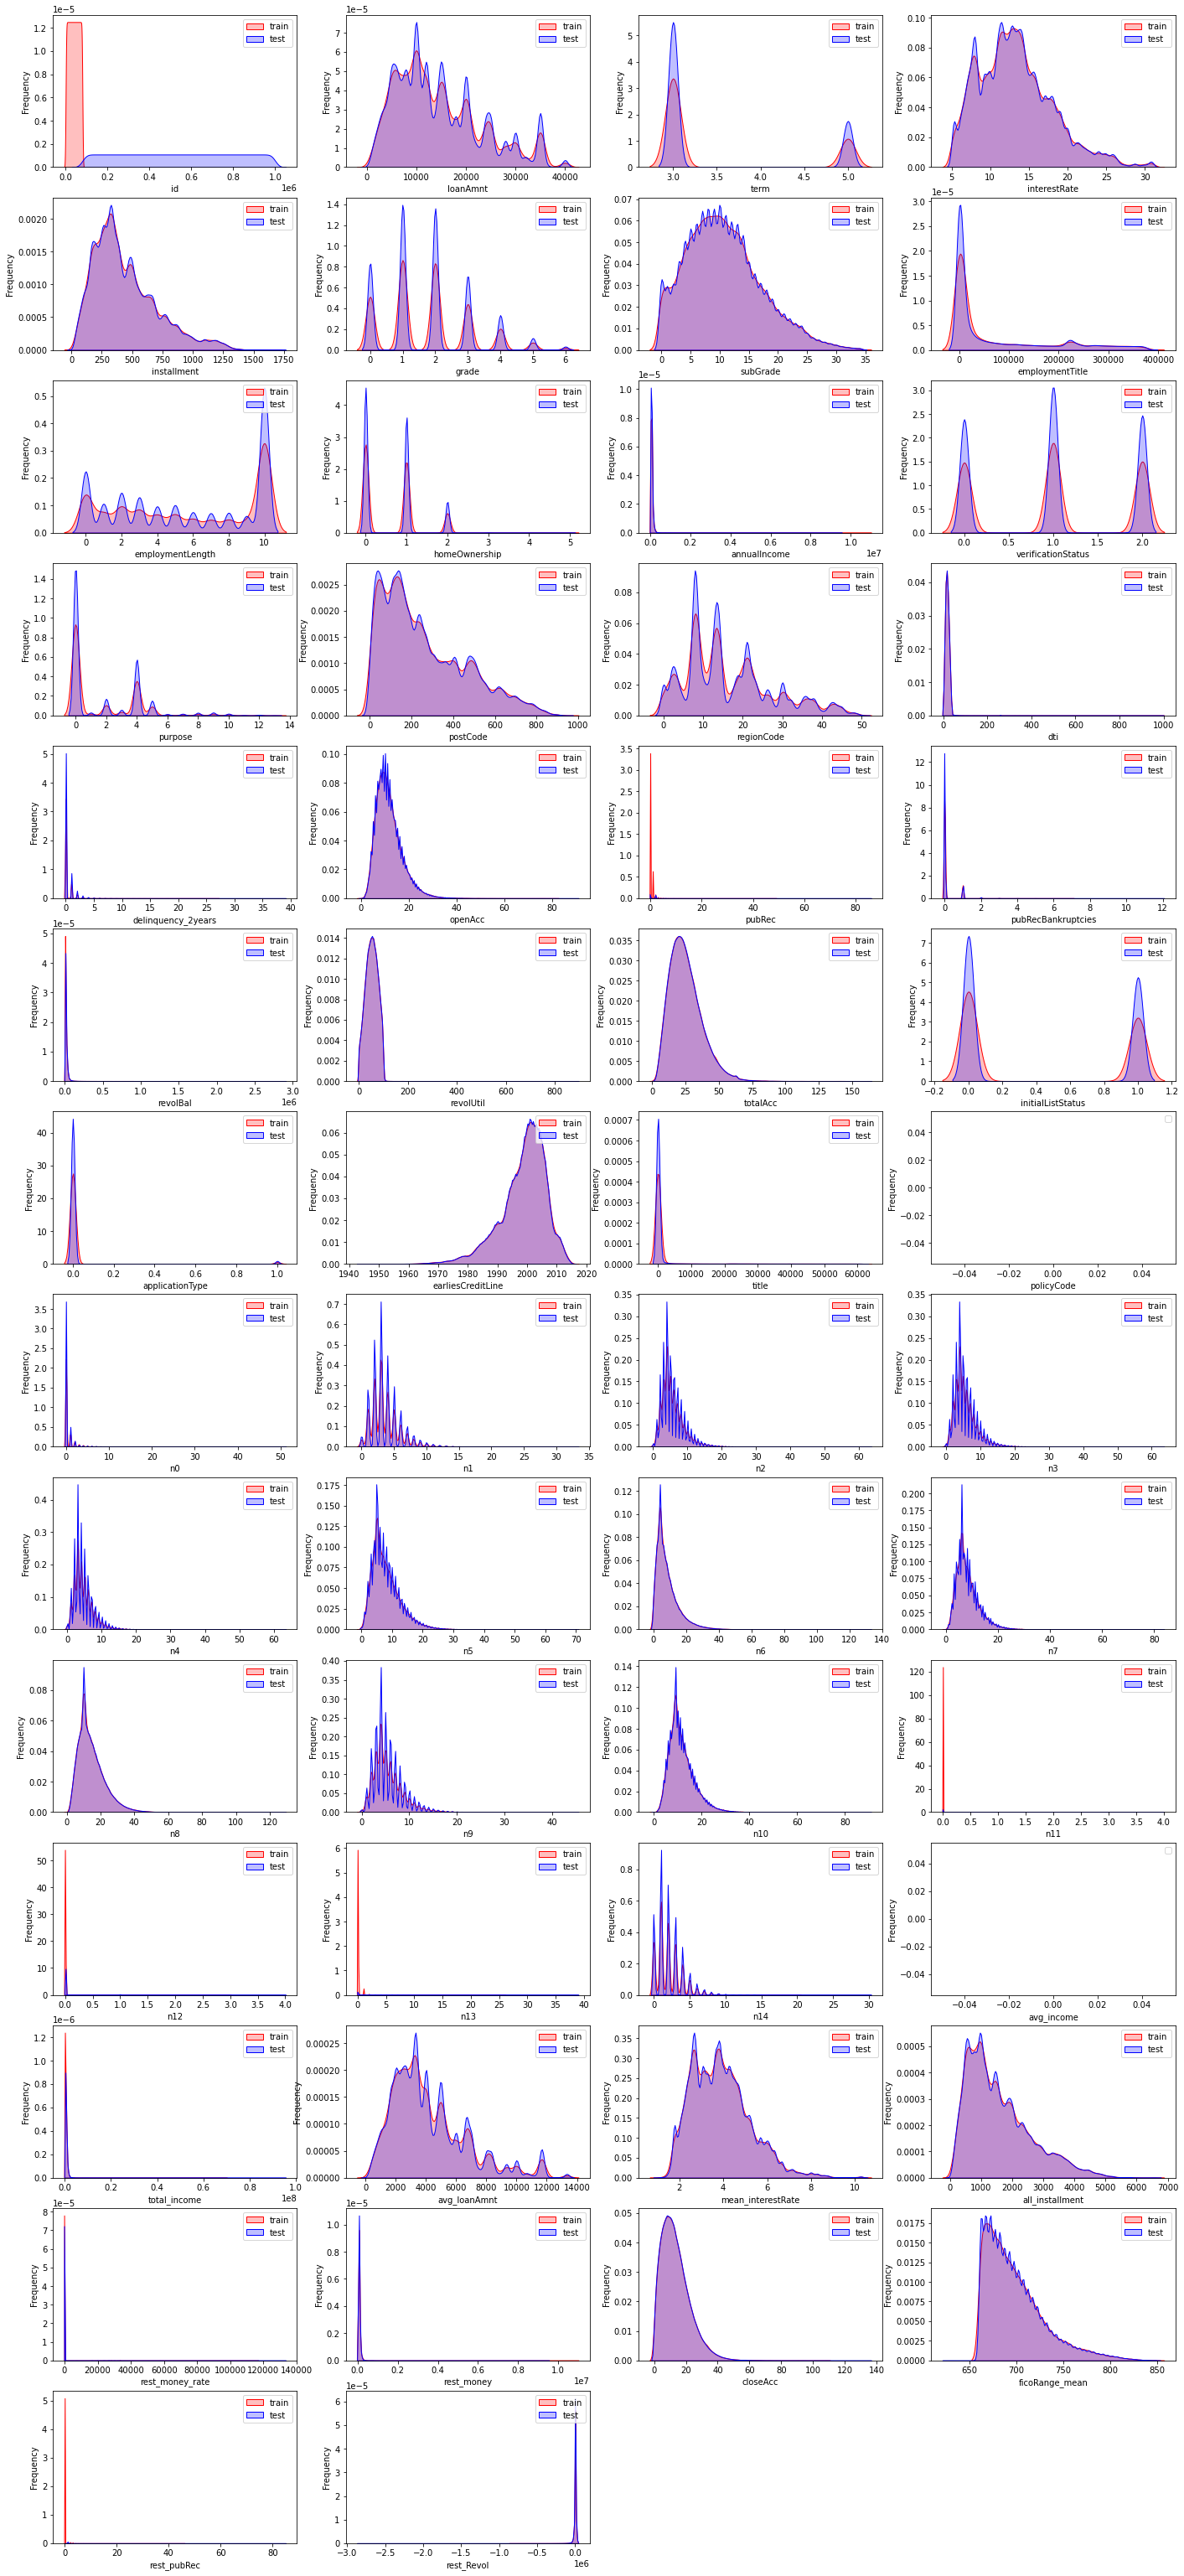

In [13]:
img_cols=4
img_rows=len(data.columns)
plt.figure(figsize=(4*6,4*img_rows))
i=1
for col in data.columns:
    ax=plt.subplot(img_rows,img_cols,i)
    ax=sns.kdeplot(data[:80000][col],color="Red",shade=True)
    ax=sns.kdeplot(data[80000:][col],color="Blue",shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax=ax.legend(["train","test"])
    i+=1
plt.show()

###### 这个地方只是利用了变量的分布状况就对变量进行了删减 是否合理!?

In [16]:
dropList=['id','applicationType','policyCode','n3','n11','n12','n13']
# dropList=['id','ficoRangeHigh','applicationType','policyCode','n3','n11','n12','n13']
data.drop(dropList,axis=1,inplace=True)

classList=[i for i in data.columns if len(data[i].value_counts())<=10]

到这个地方为止将有效变量都删选了出来，然后需要对每个有效变量内部的数据进行筛选
就是需要处理其中的异常值。
为什么需要重新从data里面切割数据放入到train_data当中呢？因为前面的所有操作都是对data的操作，因此到这个地方又需要重新开始对训练集和测试集分开进行操作了
而且处理的仅仅是训练集的异常值
当然，需要干的第一件事情是查看每个变量的异常值状况。这个时候箱型图就可以胜任这个工作。
如果存在过多的异常值肯定要将异常值筛除
另外，当数据倾向于正态分布的时候，机器学习的准确率会有所提高。
因此，另外还需要检测的内容就是，这些变量是否符合正态分布？

## 异常值处理

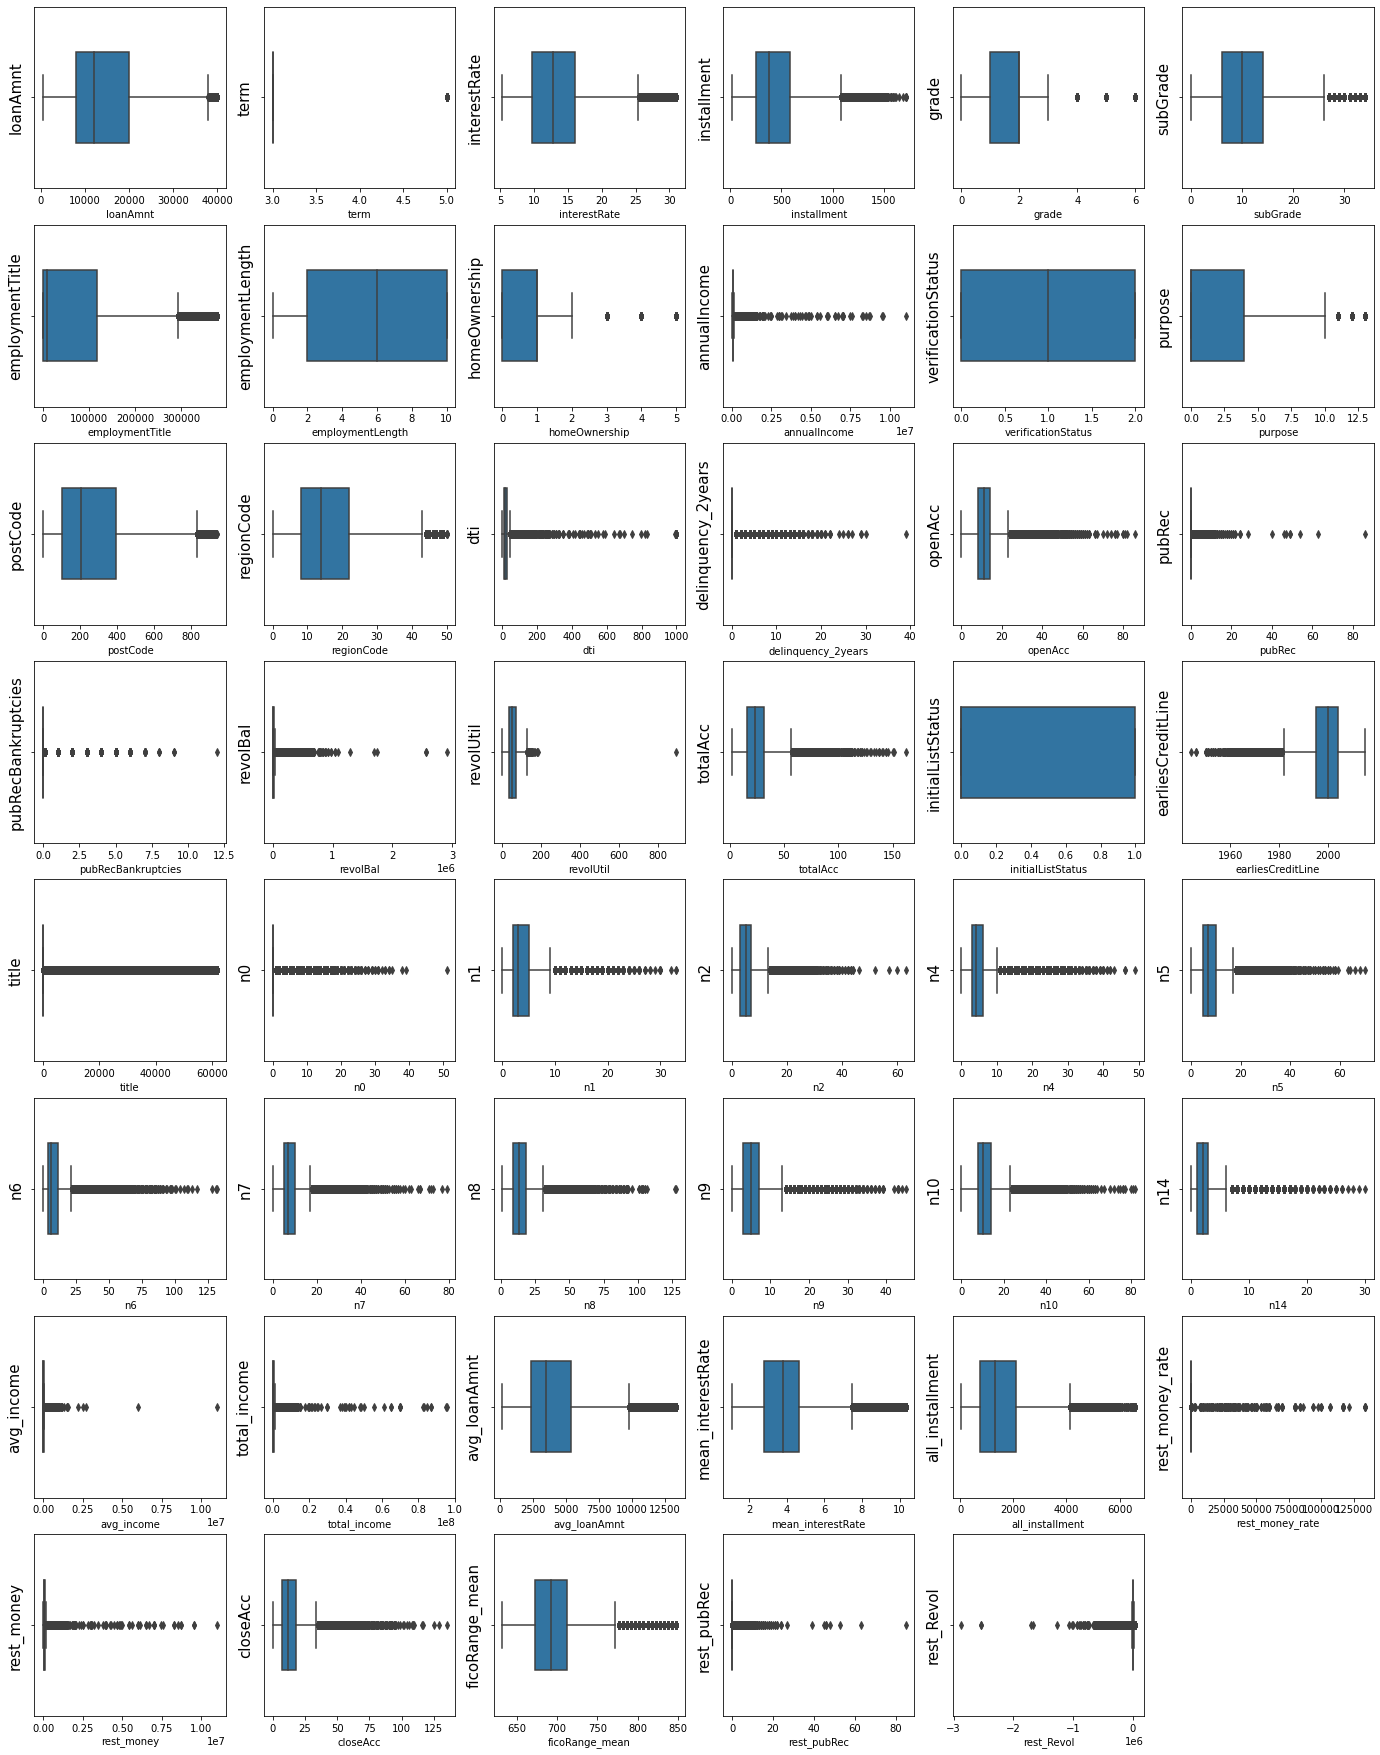

In [17]:
train_data=data[:800000]
column=train_data.columns.tolist()
img_cols=6
img_rows=len(column)
plt.figure(figsize=(4*6,4*len(column)))
i=1
for col in data.columns:
    plt.subplot(img_rows,img_cols,i)
    sns.boxplot(train_data[col],orient="v",width=0.5)
    plt.ylabel(col,fontsize=15)
    i+=1
plt.show()

train_data中另外创建了一列 label 用于存放target中的值，这个时候train_data从(800000,37)变成了(800000,38)
同样在classList中也多出了这一列
而且numlist是第一次出现？一共有32个变量。不同于前面定义的三种类型，因为这个时候object类型变量已经完全的转化了。
因此总共的变量其实也只有两种类型了。也就是连续型变量和离散型变量。
numList 32
classList 6
但是最终的结果显示并没有数值类型的变量能够符合正态分布，因此对这些数据都需要做另外的处理才能够提升足够的准确度

## 数据正态化

In [19]:
import numpy as np
from scipy.stats import kstest
train_data['label']=target
classList=['term', 'grade', 'homeOwnership', 'verificationStatus', 'initialListStatus','label']
numList=[i for i in train_data.columns if i not in classList]
# 这个需要删除就是上面dropList里面的内容，这部分内容不会对结果产生影响
# xuyaoshanchu = ['id','ficoRangeHigh','ficoRangeHigh','applicationType','policyCode','n3','n11','n12','n13']
# numList = [i for i in numList if i not in xuyaoshanchu]

Q：不知道为啥不用这样，只需要执行那两个图片的显示，然后数据的格式就会自动转化过来
毒瘤数据
A：主要原因还是在显示图片的时候使用了转换的方式，这里刚好也利用了这样的方式。

In [20]:
# 如果数据服从正太分布 则利用正态分布处理 
for i in numList:
    print(kstest(data[i], 'norm', (data[i].mean(), data[i].std())))
#都不符合正太分布
#pvalue>0.05 为正太分布

KstestResult(statistic=0.11806055878286709, pvalue=0.0)
KstestResult(statistic=0.06104710473554076, pvalue=0.0)
KstestResult(statistic=0.10049591367831434, pvalue=0.0)
KstestResult(statistic=0.07305806031941131, pvalue=0.0)
KstestResult(statistic=0.26850578326931024, pvalue=0.0)
KstestResult(statistic=0.20139951678993073, pvalue=0.0)
KstestResult(statistic=0.20427577663165858, pvalue=0.0)
KstestResult(statistic=0.3497739374112357, pvalue=0.0)
KstestResult(statistic=0.11702263072723768, pvalue=0.0)
KstestResult(statistic=0.156141433662279, pvalue=0.0)
KstestResult(statistic=0.08190059240282682, pvalue=0.0)
KstestResult(statistic=0.44824549766212163, pvalue=0.0)
KstestResult(statistic=0.11329059607723663, pvalue=0.0)
KstestResult(statistic=0.46940130019588305, pvalue=0.0)
KstestResult(statistic=0.5137916753466008, pvalue=0.0)
KstestResult(statistic=0.23482735845566344, pvalue=0.0)
KstestResult(statistic=0.030456911847499324, pvalue=0.0)
KstestResult(statistic=0.07545568917716206, pvalue=

In [21]:
percentile=pd.DataFrame()
percentile['columns']=numList

In [22]:
dropList=[]
count=0
for i in tqdm(numList):
    count+=1
    deg=train_data[i]
    mean = np.mean(deg)
    var = np.var(deg)
    percentile = np.percentile(deg, (25, 50, 75), interpolation='midpoint')
    Q1 = percentile[0]#上四分位数
    Q3 = percentile[2]#下四分位数
    IQR = Q3 - Q1#四分位距
    ulim = Q3 + 1.5*IQR#上限 非异常范围内的最大值
    llim = Q1 - 1.5*IQR#下限 非异常范围内的最小值
    new_deg = []
    for i in range(len(deg)):
        if(llim<deg[i] and deg[i]<ulim):
            new_deg.append(deg[i])
    droppre=((len(deg)-len(new_deg))/len(deg))*100
    dropList.append(droppre)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [07:15<00:00, 10.38s/it]


这一串代码干的事情
创建了个pd.DataFrame的类，里面有这些内容：
Empty DataFrame
Columns: []
Index: []
而且像代码这样，可以一次性塞入很多的列，如果有数据会直接变成一个可以使用的DataFrame结构的数据表？
这个四分卫是？
主要获得了一个new_deg 还有个 dropList
然后还有下面这个代码块的作用又是什么？
修改了显示，然后将数据都放入到之前定义的percentile当中，并对第一列的内容作了map操作？
这个是不是减小了变量之间的相关性关系？！
然后放入到了一个judgeList 27 当中
然后接下来的内容是对数据进行正态化删除异常值然后反归一化还原数据
还想知道iloc这个东西是干了什么,哦哦，是取了0:38列的所有行
最后那句话还给它输出了csv的文件方便作为其他软件的接口？！

In [23]:
dropList=[('%.4f' % i) for i in dropList]
percentile=pd.DataFrame([numList,dropList]).T
percentile[1]=percentile[1].map(lambda x:-1 if str(x)=='nan' else float(x))
judgeList=list(percentile[percentile[1]<=10][0])

In [24]:
train_data_1=train_data.copy()
#先数据正太化，再利用3σ原则剔除异常数据，反归一化即可还原数据
#先数据正太化，再利用3σ原则剔除异常数据，反归一化即可还原数据
stdsc=StandardScaler()
drop_index=[]
for i in tqdm(numList):
    new_i="zheng_"+i
    train_data_1[new_i]=stdsc.fit_transform(train_data_1[i].values.reshape(-1,1))
    data_std = np.std(train_data_1[new_i])
    data_mean = np.mean(train_data_1[new_i])
    outliers_cut_off = data_std * 3
    lower_rule = data_mean - outliers_cut_off
    upper_rule = data_mean + outliers_cut_off
    train_data_1=train_data_1.drop(train_data_1[(train_data_1[new_i])>ulim].index)
    train_data_1=train_data_1.drop(train_data_1[(train_data_1[new_i])<llim].index)
    
train_data_2=train_data_1.iloc[:,:38]

 74%|████████████████████████████████████████████████████████████▌                     | 31/42 [00:20<00:07,  1.55it/s]


ValueError: Input contains infinity or a value too large for dtype('float64').

"""
train_data_2.to_csv('正态分布训练集.csv',index=0)
下面这句话还有bug啊！否则会自动生成一个序列
train_data_2.to_csv(r"E:\CODE\ProgrammingProgect\pythoncoding\基于数据分析的金融风控预测（毕业设计）\baseline\正态分布训练集.csv")

"""
train_data_2.to_csv(r"E:\CODE\ProgrammingProgect\pythoncoding\基于数据分析的金融风控预测（毕业设计）\baseline\正态分布训练集.csv",index = 0)

到这个地方为止所有的数据清洗的工作就完成了，接下来就可以对模型方面的内容进行继续的处理了
将正态化清洗完毕的数据存储起来(这个数据可以直接在后续内容当中使用)

将80w往后的data数据作为测试集，并存储起来.将正态化最终处理完毕的数据作为训练集
取出训练集中的label，并删除，然后又对原来的数据进行拼接。

为啥会有下面这句话呢？因为最终被处理完毕的数据都被重新存储下来了，现在要做的只是读取，就不需要另外重新从头清洗一遍了

而且因为反归一化了所以数据看起来还是和原来一样正常
但是后面用的数据应该都用train_data_zt 和 data的后20w作为测试集

# 构建模型

In [26]:
train_data_2 = pd.read_csv(r"E:\CODE\ProgrammingProgect\pythoncoding\基于数据分析的金融风控预测（毕业设计）\baseline\正态分布训练集.csv",encoding = "gbk")

这个地方虽然从原始处理好的数据当中获得测试集，但是后来data又马上被覆盖了
下面这两行的代码。保证了测试集的数据独立性。使得程序不用再重头运行。
而且这两句像不用再运行了呀。

In [54]:
# test_data = data[800000:]
# test_data.to_csv(r"E:\CODE\ProgrammingProgect\pythoncoding\基于数据分析的金融风控预测（毕业设计）\baseline\缺失值测试集.csv",index = 0)
test_data = pd.read_csv(r"E:\CODE\ProgrammingProgect\pythoncoding\基于数据分析的金融风控预测（毕业设计）\baseline\缺失值测试集.csv")

In [55]:
train_data_zt = train_data_2

label = train_data_zt['label']
train_data_zt = train_data_zt.drop('label',axis=1)

# data=pd.concat([train_data_zt,test_data])


x_train_gbdt = train_data_zt

# datattt = x_train_gbdt

y_train_gbdt = label

# 下面这两句话我都没有运行。
# datattt['label'] = y_train_gbdt
# # 下面这句话有什么用？
# datattt = datattt.reset_index(drop=True)

这个地方最关键的一个点。就是获得了x和y。
然后就可以尝试使用不同模型来进行训练。
有些时候都是简单的模型和复杂的模型一起进行尝试的。当简单的识别效果不好。才会尝试使用复杂的模型。
将训练结果比较好的模型留下来。然后进行进一步细致的调整，才有了下面这个内容。

## 模型尝试

In [31]:
train_val_x = x_train_gbdt
train_val_y = y_train_gbdt

model={}
model['rfc']=RandomForestClassifier()
model['gdbt']=GradientBoostingClassifier()
model['cart']=DecisionTreeClassifier()
model['knn']=KNeighborsClassifier()
model['lr']=LogisticRegression()
# model['bayes']= MultinomialNB() 
for i in model:
    model[i].fit(train_val_x,train_val_y)
    score=cross_val_score(model[i],train_val_x,train_val_y,cv=5,scoring='roc_auc')
    print('%s的auc为：%.3f'%(i,score.mean()))

rfc的auc为：0.706
gdbt的auc为：0.719
cart的auc为：0.552
knn的auc为：0.541
lr的auc为：0.638


随机森林分类的收敛速度大概是20min [https://www.jianshu.com/p/c1afbe4b9364]

gdbt梯度提升回归的收敛速度大概是60min

cart的速度大概是15min

knn和lr的模型的收敛速度大概是在5min左右（基础模型的收敛速度会更加快速）

###### 集成模型
[https://www.cnblogs.com/mantch/p/10203143.html]

从这个地方我们可以发现集成模型的效果相对于单个模型的效果会更加好，因此选择集成模型进行后面的参数调整和二次提升的效果

## lightgbm模型

###### boosting框架下的集成算法
基于树模型的梯度提升框架 [https://blog.csdn.net/u011984148/article/details/99439664]

In [33]:
import lightgbm
def select_by_lgb(train_data,train_label,random_state=2020,n_splits=5,metric='auc',num_round=10000,early_stopping_rounds=200):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    feature_importances = pd.DataFrame()
    feature_importances['feature'] = train_data.columns
    fold=0
    for train_idx, val_idx in kfold.split(train_data):
        random_state+=1
        train_x = train_data.loc[train_idx]
        train_y = train_label.loc[train_idx]
        test_x = train_data.loc[val_idx]
        test_y = train_label.loc[val_idx]
        clf=lightgbm
        train_matrix=clf.Dataset(train_x,label=train_y)
        test_matrix=clf.Dataset(test_x,label=test_y)
       
        params={
                'boosting_type': 'gbdt',  
                'objective': 'binary',
                'learning_rate': 0.1,
                'metric': metric,
                'seed': 2020,
                'nthread':-1 }
        
        model = clf.train(
            params,
            train_matrix,
            num_round,valid_sets = test_matrix,
            early_stopping_rounds = early_stopping_rounds)
        
        feature_importances['fold_{}'.format(fold + 1)] = model.feature_importance()
        fold+=1
    feature_importances['averge']=feature_importances[['fold_{}'.format(i) for i in range(1,n_splits+1)]].mean(axis=1)
    return feature_importances




feature_importances=select_by_lgb(x_train_gbdt,y_train_gbdt)

feature_importances['averge']=feature_importances[['fold_{}'.format(i) for i in range(1,6)]].mean(axis=1)


[LightGBM] [Info] Number of positive: 116697, number of negative: 464493
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3229
[LightGBM] [Info] Number of data points in the train set: 581190, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200790 -> initscore=-1.381366
[LightGBM] [Info] Start training from score -1.381366
[1]	valid_0's auc: 0.69468
Training until validation scores don't improve for 200 rounds
[2]	valid_0's auc: 0.698132
[3]	valid_0's auc: 0.699811
[4]	valid_0's auc: 0.701479
[5]	valid_0's auc: 0.702113
[6]	valid_0's auc: 0.703277
[7]	valid_0's auc: 0.70365
[8]	valid_0's auc: 0.70415
[9]	valid_0's auc: 0.704766
[10]	valid_0's auc: 0.705199
[11]	valid_0's auc: 0.705884
[12]	valid_0's auc: 0.706361
[13]	valid_0's auc: 0.706883
[14]	vali

[263]	valid_0's auc: 0.725203
[264]	valid_0's auc: 0.725209
[265]	valid_0's auc: 0.725212
[266]	valid_0's auc: 0.725222
[267]	valid_0's auc: 0.725214
[268]	valid_0's auc: 0.725214
[269]	valid_0's auc: 0.7252
[270]	valid_0's auc: 0.725186
[271]	valid_0's auc: 0.725184
[272]	valid_0's auc: 0.725182
[273]	valid_0's auc: 0.725194
[274]	valid_0's auc: 0.725195
[275]	valid_0's auc: 0.725196
[276]	valid_0's auc: 0.725191
[277]	valid_0's auc: 0.725225
[278]	valid_0's auc: 0.72524
[279]	valid_0's auc: 0.725244
[280]	valid_0's auc: 0.725248
[281]	valid_0's auc: 0.725235
[282]	valid_0's auc: 0.725246
[283]	valid_0's auc: 0.725238
[284]	valid_0's auc: 0.725238
[285]	valid_0's auc: 0.725232
[286]	valid_0's auc: 0.725235
[287]	valid_0's auc: 0.725253
[288]	valid_0's auc: 0.725249
[289]	valid_0's auc: 0.72525
[290]	valid_0's auc: 0.725235
[291]	valid_0's auc: 0.725228
[292]	valid_0's auc: 0.725247
[293]	valid_0's auc: 0.725263
[294]	valid_0's auc: 0.725255
[295]	valid_0's auc: 0.725285
[296]	valid_0'

[537]	valid_0's auc: 0.725502
[538]	valid_0's auc: 0.725513
[539]	valid_0's auc: 0.725519
[540]	valid_0's auc: 0.725538
[541]	valid_0's auc: 0.725537
[542]	valid_0's auc: 0.725543
[543]	valid_0's auc: 0.725558
[544]	valid_0's auc: 0.725554
[545]	valid_0's auc: 0.725567
[546]	valid_0's auc: 0.725583
[547]	valid_0's auc: 0.725579
[548]	valid_0's auc: 0.725572
[549]	valid_0's auc: 0.725569
[550]	valid_0's auc: 0.725574
[551]	valid_0's auc: 0.72555
[552]	valid_0's auc: 0.725557
[553]	valid_0's auc: 0.725551
[554]	valid_0's auc: 0.725534
[555]	valid_0's auc: 0.725538
[556]	valid_0's auc: 0.72556
[557]	valid_0's auc: 0.725584
[558]	valid_0's auc: 0.725586
[559]	valid_0's auc: 0.725561
[560]	valid_0's auc: 0.725551
[561]	valid_0's auc: 0.725545
[562]	valid_0's auc: 0.725533
[563]	valid_0's auc: 0.725526
[564]	valid_0's auc: 0.72552
[565]	valid_0's auc: 0.725525
[566]	valid_0's auc: 0.725529
[567]	valid_0's auc: 0.72552
[568]	valid_0's auc: 0.725533
[569]	valid_0's auc: 0.725533
[570]	valid_0'

[195]	valid_0's auc: 0.727791
[196]	valid_0's auc: 0.727814
[197]	valid_0's auc: 0.727814
[198]	valid_0's auc: 0.72781
[199]	valid_0's auc: 0.7278
[200]	valid_0's auc: 0.7278
[201]	valid_0's auc: 0.727828
[202]	valid_0's auc: 0.727865
[203]	valid_0's auc: 0.727868
[204]	valid_0's auc: 0.727856
[205]	valid_0's auc: 0.727857
[206]	valid_0's auc: 0.727865
[207]	valid_0's auc: 0.727869
[208]	valid_0's auc: 0.727884
[209]	valid_0's auc: 0.7279
[210]	valid_0's auc: 0.727891
[211]	valid_0's auc: 0.727924
[212]	valid_0's auc: 0.727882
[213]	valid_0's auc: 0.727942
[214]	valid_0's auc: 0.727937
[215]	valid_0's auc: 0.727942
[216]	valid_0's auc: 0.727944
[217]	valid_0's auc: 0.727948
[218]	valid_0's auc: 0.727956
[219]	valid_0's auc: 0.727944
[220]	valid_0's auc: 0.72795
[221]	valid_0's auc: 0.727963
[222]	valid_0's auc: 0.727972
[223]	valid_0's auc: 0.72801
[224]	valid_0's auc: 0.728036
[225]	valid_0's auc: 0.728052
[226]	valid_0's auc: 0.728064
[227]	valid_0's auc: 0.728054
[228]	valid_0's auc

[475]	valid_0's auc: 0.728585
[476]	valid_0's auc: 0.728584
[477]	valid_0's auc: 0.728585
[478]	valid_0's auc: 0.728578
[479]	valid_0's auc: 0.728575
[480]	valid_0's auc: 0.728589
[481]	valid_0's auc: 0.728601
[482]	valid_0's auc: 0.728609
[483]	valid_0's auc: 0.728607
[484]	valid_0's auc: 0.728637
[485]	valid_0's auc: 0.728632
[486]	valid_0's auc: 0.728638
[487]	valid_0's auc: 0.728623
[488]	valid_0's auc: 0.728613
[489]	valid_0's auc: 0.728598
[490]	valid_0's auc: 0.728614
[491]	valid_0's auc: 0.728642
[492]	valid_0's auc: 0.728663
[493]	valid_0's auc: 0.728666
[494]	valid_0's auc: 0.72865
[495]	valid_0's auc: 0.728657
[496]	valid_0's auc: 0.728661
[497]	valid_0's auc: 0.728646
[498]	valid_0's auc: 0.728641
[499]	valid_0's auc: 0.728649
[500]	valid_0's auc: 0.728652
[501]	valid_0's auc: 0.728672
[502]	valid_0's auc: 0.728694
[503]	valid_0's auc: 0.728696
[504]	valid_0's auc: 0.728681
[505]	valid_0's auc: 0.728685
[506]	valid_0's auc: 0.728682
[507]	valid_0's auc: 0.728694
[508]	valid

[751]	valid_0's auc: 0.728831
[752]	valid_0's auc: 0.728832
[753]	valid_0's auc: 0.728832
[754]	valid_0's auc: 0.72883
[755]	valid_0's auc: 0.728812
[756]	valid_0's auc: 0.7288
[757]	valid_0's auc: 0.72879
[758]	valid_0's auc: 0.728769
[759]	valid_0's auc: 0.728789
[760]	valid_0's auc: 0.728791
[761]	valid_0's auc: 0.728801
[762]	valid_0's auc: 0.728812
[763]	valid_0's auc: 0.728811
[764]	valid_0's auc: 0.728811
[765]	valid_0's auc: 0.728829
[766]	valid_0's auc: 0.728829
[767]	valid_0's auc: 0.728835
[768]	valid_0's auc: 0.728828
[769]	valid_0's auc: 0.728811
[770]	valid_0's auc: 0.728807
[771]	valid_0's auc: 0.728796
[772]	valid_0's auc: 0.728771
[773]	valid_0's auc: 0.728793
[774]	valid_0's auc: 0.728796
[775]	valid_0's auc: 0.728786
[776]	valid_0's auc: 0.728787
[777]	valid_0's auc: 0.728791
[778]	valid_0's auc: 0.72878
[779]	valid_0's auc: 0.728787
[780]	valid_0's auc: 0.728781
[781]	valid_0's auc: 0.728784
[782]	valid_0's auc: 0.728798
[783]	valid_0's auc: 0.728795
[784]	valid_0's

[147]	valid_0's auc: 0.723864
[148]	valid_0's auc: 0.723862
[149]	valid_0's auc: 0.723904
[150]	valid_0's auc: 0.723883
[151]	valid_0's auc: 0.723886
[152]	valid_0's auc: 0.723885
[153]	valid_0's auc: 0.723877
[154]	valid_0's auc: 0.723914
[155]	valid_0's auc: 0.723906
[156]	valid_0's auc: 0.723915
[157]	valid_0's auc: 0.723958
[158]	valid_0's auc: 0.723974
[159]	valid_0's auc: 0.724002
[160]	valid_0's auc: 0.723997
[161]	valid_0's auc: 0.723999
[162]	valid_0's auc: 0.723996
[163]	valid_0's auc: 0.724031
[164]	valid_0's auc: 0.724046
[165]	valid_0's auc: 0.724062
[166]	valid_0's auc: 0.724068
[167]	valid_0's auc: 0.724052
[168]	valid_0's auc: 0.724048
[169]	valid_0's auc: 0.724048
[170]	valid_0's auc: 0.724058
[171]	valid_0's auc: 0.724085
[172]	valid_0's auc: 0.72409
[173]	valid_0's auc: 0.724121
[174]	valid_0's auc: 0.724117
[175]	valid_0's auc: 0.724133
[176]	valid_0's auc: 0.724119
[177]	valid_0's auc: 0.724109
[178]	valid_0's auc: 0.724123
[179]	valid_0's auc: 0.724125
[180]	valid

[422]	valid_0's auc: 0.725213
[423]	valid_0's auc: 0.725214
[424]	valid_0's auc: 0.725238
[425]	valid_0's auc: 0.725239
[426]	valid_0's auc: 0.725236
[427]	valid_0's auc: 0.725247
[428]	valid_0's auc: 0.72523
[429]	valid_0's auc: 0.725266
[430]	valid_0's auc: 0.725271
[431]	valid_0's auc: 0.725262
[432]	valid_0's auc: 0.725255
[433]	valid_0's auc: 0.725274
[434]	valid_0's auc: 0.725285
[435]	valid_0's auc: 0.725267
[436]	valid_0's auc: 0.725262
[437]	valid_0's auc: 0.725258
[438]	valid_0's auc: 0.725256
[439]	valid_0's auc: 0.725272
[440]	valid_0's auc: 0.725271
[441]	valid_0's auc: 0.725266
[442]	valid_0's auc: 0.725258
[443]	valid_0's auc: 0.725254
[444]	valid_0's auc: 0.725243
[445]	valid_0's auc: 0.725225
[446]	valid_0's auc: 0.725207
[447]	valid_0's auc: 0.725214
[448]	valid_0's auc: 0.725196
[449]	valid_0's auc: 0.725193
[450]	valid_0's auc: 0.72519
[451]	valid_0's auc: 0.725182
[452]	valid_0's auc: 0.725172
[453]	valid_0's auc: 0.725169
[454]	valid_0's auc: 0.725177
[455]	valid_

[317]	valid_0's auc: 0.729681
[318]	valid_0's auc: 0.729691
[319]	valid_0's auc: 0.729644
[320]	valid_0's auc: 0.729655
[321]	valid_0's auc: 0.729644
[322]	valid_0's auc: 0.729653
[323]	valid_0's auc: 0.729649
[324]	valid_0's auc: 0.729651
[325]	valid_0's auc: 0.729655
[326]	valid_0's auc: 0.729651
[327]	valid_0's auc: 0.729633
[328]	valid_0's auc: 0.729655
[329]	valid_0's auc: 0.729702
[330]	valid_0's auc: 0.729697
[331]	valid_0's auc: 0.729688
[332]	valid_0's auc: 0.729749
[333]	valid_0's auc: 0.729758
[334]	valid_0's auc: 0.729765
[335]	valid_0's auc: 0.729757
[336]	valid_0's auc: 0.729755
[337]	valid_0's auc: 0.729744
[338]	valid_0's auc: 0.729745
[339]	valid_0's auc: 0.729734
[340]	valid_0's auc: 0.729725
[341]	valid_0's auc: 0.729733
[342]	valid_0's auc: 0.729749
[343]	valid_0's auc: 0.729769
[344]	valid_0's auc: 0.729744
[345]	valid_0's auc: 0.729735
[346]	valid_0's auc: 0.729716
[347]	valid_0's auc: 0.729715
[348]	valid_0's auc: 0.72973
[349]	valid_0's auc: 0.729732
[350]	valid

[16]	valid_0's auc: 0.711406
[17]	valid_0's auc: 0.711776
[18]	valid_0's auc: 0.71217
[19]	valid_0's auc: 0.712636
[20]	valid_0's auc: 0.713038
[21]	valid_0's auc: 0.713535
[22]	valid_0's auc: 0.713802
[23]	valid_0's auc: 0.714142
[24]	valid_0's auc: 0.714539
[25]	valid_0's auc: 0.714859
[26]	valid_0's auc: 0.715158
[27]	valid_0's auc: 0.7155
[28]	valid_0's auc: 0.715776
[29]	valid_0's auc: 0.716077
[30]	valid_0's auc: 0.716367
[31]	valid_0's auc: 0.716701
[32]	valid_0's auc: 0.716925
[33]	valid_0's auc: 0.717238
[34]	valid_0's auc: 0.717425
[35]	valid_0's auc: 0.717661
[36]	valid_0's auc: 0.717889
[37]	valid_0's auc: 0.718119
[38]	valid_0's auc: 0.718287
[39]	valid_0's auc: 0.71847
[40]	valid_0's auc: 0.718721
[41]	valid_0's auc: 0.718947
[42]	valid_0's auc: 0.71908
[43]	valid_0's auc: 0.719276
[44]	valid_0's auc: 0.719446
[45]	valid_0's auc: 0.719603
[46]	valid_0's auc: 0.719802
[47]	valid_0's auc: 0.719961
[48]	valid_0's auc: 0.720085
[49]	valid_0's auc: 0.720154
[50]	valid_0's auc:

[295]	valid_0's auc: 0.726831
[296]	valid_0's auc: 0.726845
[297]	valid_0's auc: 0.72687
[298]	valid_0's auc: 0.726854
[299]	valid_0's auc: 0.726858
[300]	valid_0's auc: 0.72686
[301]	valid_0's auc: 0.726857
[302]	valid_0's auc: 0.726864
[303]	valid_0's auc: 0.726865
[304]	valid_0's auc: 0.726879
[305]	valid_0's auc: 0.726879
[306]	valid_0's auc: 0.726882
[307]	valid_0's auc: 0.726873
[308]	valid_0's auc: 0.726886
[309]	valid_0's auc: 0.726886
[310]	valid_0's auc: 0.72688
[311]	valid_0's auc: 0.72688
[312]	valid_0's auc: 0.72688
[313]	valid_0's auc: 0.726873
[314]	valid_0's auc: 0.726855
[315]	valid_0's auc: 0.726877
[316]	valid_0's auc: 0.726926
[317]	valid_0's auc: 0.726935
[318]	valid_0's auc: 0.726975
[319]	valid_0's auc: 0.726986
[320]	valid_0's auc: 0.726986
[321]	valid_0's auc: 0.726967
[322]	valid_0's auc: 0.727
[323]	valid_0's auc: 0.727016
[324]	valid_0's auc: 0.726986
[325]	valid_0's auc: 0.727002
[326]	valid_0's auc: 0.726978
[327]	valid_0's auc: 0.727013
[328]	valid_0's au

[570]	valid_0's auc: 0.727061
[571]	valid_0's auc: 0.727066
[572]	valid_0's auc: 0.727086
[573]	valid_0's auc: 0.727094
[574]	valid_0's auc: 0.727103
[575]	valid_0's auc: 0.727117
[576]	valid_0's auc: 0.727108
[577]	valid_0's auc: 0.727087
[578]	valid_0's auc: 0.727099
[579]	valid_0's auc: 0.727121
[580]	valid_0's auc: 0.727113
[581]	valid_0's auc: 0.727109
[582]	valid_0's auc: 0.727112
[583]	valid_0's auc: 0.72711
[584]	valid_0's auc: 0.727106
[585]	valid_0's auc: 0.72711
[586]	valid_0's auc: 0.727094
[587]	valid_0's auc: 0.727082
[588]	valid_0's auc: 0.727077
[589]	valid_0's auc: 0.72706
[590]	valid_0's auc: 0.72705
[591]	valid_0's auc: 0.72705
[592]	valid_0's auc: 0.727038
[593]	valid_0's auc: 0.727028
[594]	valid_0's auc: 0.727032
[595]	valid_0's auc: 0.727029
[596]	valid_0's auc: 0.727034
[597]	valid_0's auc: 0.727043
[598]	valid_0's auc: 0.727027
[599]	valid_0's auc: 0.727022
[600]	valid_0's auc: 0.727024
[601]	valid_0's auc: 0.727017
[602]	valid_0's auc: 0.727002
[603]	valid_0's

In [67]:
feature_importances

,feature,fold_1,fold_2,fold_3,fold_4,fold_5,averge
0,loanAmnt,499,841,570,456,545,582.2
1,term,132,173,131,128,145,141.8
2,interestRate,703,1147,735,603,737,785.0
3,installment,554,906,579,461,564,612.8
4,grade,55,105,63,59,74,71.2
5,subGrade,225,401,284,232,292,286.8
6,employmentTitle,750,1191,727,627,789,816.8
7,employmentLength,278,503,293,274,335,336.6
8,homeOwnership,216,276,212,209,217,226.0
9,annualIncome,705,1224,801,648,791,833.8


## lgb贝叶斯优化

csdn参考文章
https://blog.csdn.net/qq_42283960/article/details/88317003


In [34]:
from bayes_opt import BayesianOptimization
train_x, val_x, train_y, val_y = train_test_split(x_train_gbdt,y_train_gbdt, test_size = 0.3, random_state = 5)

train_test_split()函数是用来随机划分样本数据为训练集和测试集的，当然也可以人为的切片划分。

优点：随机客观的划分数据，减少人为因素

完整模板：

train_X,test_X,train_y,test_y = train_test_split(train_data,train_target,test_size=0.3,random_state=5)

参数解释：

train_data：待划分样本数据

train_target：待划分样本数据的结果（标签）

test_size：测试数据占样本数据的比例，若整数则样本数量

random_state：设置随机数种子，保证每次都是同一个随机数。若为0或不填，则每次得到数据都不一样


In [35]:
def LGB_bayesian(
    num_leaves,  # int
    min_data_in_leaf,  # int
    learning_rate,
    min_sum_hessian_in_leaf,    # int  
    feature_fraction,
    lambda_l1,
    lambda_l2,
    min_gain_to_split,
    max_depth):
    
    # LightGBM expects next three parameters need to be integer. So we make them integer
    num_leaves = int(num_leaves)
    min_data_in_leaf = int(min_data_in_leaf)
    max_depth = int(max_depth)

    assert type(num_leaves) == int
    assert type(min_data_in_leaf) == int
    assert type(max_depth) == int

    param = {
        'num_leaves': num_leaves,
        'max_bin': 63,
        'min_data_in_leaf': min_data_in_leaf,
        'learning_rate': learning_rate,
        'min_sum_hessian_in_leaf': min_sum_hessian_in_leaf,
        'bagging_fraction': 1.0,
        'bagging_freq': 5,
        
        'feature_fraction': feature_fraction,
        'lambda_l1': lambda_l1,
        'lambda_l2': lambda_l2,
        'min_gain_to_split': min_gain_to_split,
        'max_depth': max_depth,
        'save_binary': True, 
        'seed': 1337,
        'feature_fraction_seed': 1337,
        'bagging_seed': 1337,
        'drop_seed': 1337,
        'data_random_seed': 1337,
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': 1,
        'metric': 'auc',
        'boost_from_average': False,   

    }    
# 函数到这个地方为止，上面的内容全部都是模板。
# 下面的这两个语句进行了修改。
    xg_train = lgb.Dataset(train_x,
                           label=train_y
                           )
    xg_valid = lgb.Dataset(val_x,
                           label=val_y
                           )   

    num_round = 5000
    
    clf = lgb.train(param, xg_train, num_round, valid_sets = [xg_valid], verbose_eval=250, early_stopping_rounds = 50)
    
    predictions = clf.predict(val_x, num_iteration=clf.best_iteration)   

# 
    score = roc_auc_score(val_y, predictions)
    
    
    return score

贝叶斯优化函数很多都是模板。主要修改的内容有：xg_train和xg_valid
然后还有下面的score评分方式（其实这个也是模板。）
相当于主要修改的内容就是LightGBM定义了的trainng和validation数据集。
https://blog.csdn.net/qq_42283960/article/details/88317003

In [36]:
# Bounded region of parameter space
# 参数空间的有界区域
bounds_LGB = {
    'num_leaves': (5, 20), 
    'min_data_in_leaf': (5, 20),  
    'learning_rate': (0.01, 0.3),
    'min_sum_hessian_in_leaf': (0.00001, 0.01),    
    'feature_fraction': (0.05, 0.5),
    'lambda_l1': (0, 5.0), 
    'lambda_l2': (0, 5.0), 
    'min_gain_to_split': (0, 1.0),
    'max_depth':(3,15),
}

In [37]:
LGB_BO = BayesianOptimization(LGB_bayesian, bounds_LGB, random_state=13)

In [38]:
init_points = 5
n_iter = 30
print('-' * 130)
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    LGB_BO.maximize(init_points=init_points, n_iter=n_iter, acq='ucb', xi=0.0, alpha=1e-6)

----------------------------------------------------------------------------------------------------------------------------------
|   iter    |  target   | featur... | lambda_l1 | lambda_l2 | learni... | max_depth | min_da... | min_ga... | min_su... | num_le... |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 102398, number of negative: 406143
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1285
[LightGBM] [Info] Number of data points in the train set: 508541, number of used features: 37
Training until validation scores don't improve for 50 rounds
[250]	valid_0's auc: 0.72546
Early stopping, best iteration is:
[227]	valid_0's auc: 0.725487
|  1        |  0

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[750]	valid_0's auc: 0.723218
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1750]	valid_0's auc: 0.725233
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training beca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training beca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[1500]	valid_0's auc: 0.723891
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No furthe

Training until validation scores don't improve for 50 rounds
[250]	valid_0's auc: 0.722685
[500]	valid_0's auc: 0.725152
[750]	valid_0's auc: 0.726069
[1000]	valid_0's auc: 0.726727
[1250]	valid_0's auc: 0.727346
[1500]	valid_0's auc: 0.727796
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1750]	valid_0's auc: 0.72811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] S

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
Early stopping, best iteration is:
[1761]	valid_0's auc: 0.728124
|  11       |  0.7281   |  0.4393   |  3.74     |  2.438    |  0.08111  |  14.49    |  13.22    |  0.3418   |  0.005817 |  8.655    |
[LightGBM] [Info] Number of positive: 102398, number of negative: 406143
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1285
[LightGBM] [Info] Number of data points in the train set: 508541, number of used features: 37
Training until validation scores don't improve for 50 rounds
[250]	valid_0's auc: 0.724786
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requireme

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

|  15       |  0.7234   |  0.0519   |  1.422    |  4.824    |  0.2833   |  3.415    |  17.1     |  0.7581   |  0.006249 |  9.169    |
[LightGBM] [Info] Number of positive: 102398, number of negative: 406143
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1285
[LightGBM] [Info] Number of data points in the train set: 508541, number of used features: 37
Training until validation scores don't improve for 50 rounds
[250]	valid_0's auc: 0.723653
[500]	valid_0's auc: 0.725889
[750]	valid_0's auc: 0.726671
[1000]	valid_0's auc: 0.72731
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[750]	valid_0's auc: 0.727207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training beca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [W

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Info] Number of positive: 102398, number of negative: 406143
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1285
[LightGBM] [Info] Number of data points in the train set: 508541, number of used features: 37
Training until validation scores don't improve for 50 rounds
[250]	valid_0's auc: 0.725809
Early stopping, best iteration is:
[449]	valid_0's auc: 0.726904
|  34       |  0.7269   |  0.4004   |  3.964    |  2.118    |  0.2232   |  13.21    |  8.518    |  0.003073 |  0.007408 |  12.69    |
[LightGBM] [Info] Number of positive: 102398, number of negative: 406143
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1285
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

In [39]:
# 查看调参数据，依据这个设定下面的probe内容
LGB_BO.max['params']

{'feature_fraction': 0.31393193317588663,
 'lambda_l1': 4.592234475725691,
 'lambda_l2': 3.019797930443967,
 'learning_rate': 0.04675496484634876,
 'max_depth': 10.019480917103467,
 'min_data_in_leaf': 19.984789783155488,
 'min_gain_to_split': 0.19046835383531202,
 'min_sum_hessian_in_leaf': 0.00023038709571279175,
 'num_leaves': 6.571637296909833}

In [40]:
LGB_BO.probe(
    params={'feature_fraction': 0.403, 
            'lambda_l1': 1.23, 
            'lambda_l2': 0.5436, 
            'learning_rate': 0.0264, 
            'max_depth': 12.647, 
            'min_data_in_leaf': 11.07, 
            'min_gain_to_split': 0.4694, 
            'min_sum_hessian_in_leaf': 0.00736, 
            'num_leaves':14.752},
    lazy = True, # 
)

In [41]:
# 然后再次运行
LGB_BO.maximize(init_points=0, n_iter=0) # remember no init_points or n_iter

|   iter    |  target   | featur... | lambda_l1 | lambda_l2 | learni... | max_depth | min_da... | min_ga... | min_su... | num_le... |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 102398, number of negative: 406143
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1285
[LightGBM] [Info] Number of data points in the train set: 508541, number of used features: 37
Training until validation scores don't improve for 50 rounds
[250]	valid_0's auc: 0.717949
[500]	valid_0's auc: 0.722801
[750]	valid_0's auc: 0.724622
[1000]	valid_0's auc: 0.725473
[1250]	valid_0's auc: 0.726107
[1500]	valid_0's auc: 0.726525
[1750]	valid_0's auc: 0.726827
[2000]	valid_0's auc: 0.727

In [61]:
# 运行完毕查看运行状况
for i, res in enumerate(LGB_BO.res):
    print("Iteration {}: \n\t{}".format(i, res))

Iteration 0: 
	{'target': 0.7254868105157021, 'params': {'feature_fraction': 0.3999660847582191, 'lambda_l1': 1.1877061001745615, 'lambda_l2': 4.1213926633068425, 'learning_rate': 0.2900672674324699, 'max_depth': 14.67121336685872, 'min_data_in_leaf': 11.801738711259683, 'min_gain_to_split': 0.6090424627612779, 'min_sum_hessian_in_leaf': 0.007757509880902418, 'num_leaves': 14.624200171386038}}
Iteration 1: 
	{'target': 0.7274966952611084, 'params': {'feature_fraction': 0.3749082032826262, 'lambda_l1': 0.17518262050718658, 'lambda_l2': 1.492247354445897, 'learning_rate': 0.026968622645801674, 'max_depth': 13.284731311046386, 'min_data_in_leaf': 10.592810418122113, 'min_gain_to_split': 0.679847951578097, 'min_sum_hessian_in_leaf': 0.002570236693773035, 'num_leaves': 10.21371822728738}}
Iteration 2: 
	{'target': 0.7253913107874383, 'params': {'feature_fraction': 0.05423574653643624, 'lambda_l1': 1.7916689135248487, 'lambda_l2': 4.745470908391052, 'learning_rate': 0.07319071264818977, 'max

In [59]:
# 查看最准确模型结果以及其设定参数值（其实就是上面设定的内容）
LGB_BO.max['target']

0.7285899604013183

In [60]:
LGB_BO.max['params']

# 到这个地方位置优化和最佳状态都显示出来了

{'feature_fraction': 0.31393193317588663,
 'lambda_l1': 4.592234475725691,
 'lambda_l2': 3.019797930443967,
 'learning_rate': 0.04675496484634876,
 'max_depth': 10.019480917103467,
 'min_data_in_leaf': 19.984789783155488,
 'min_gain_to_split': 0.19046835383531202,
 'min_sum_hessian_in_leaf': 0.00023038709571279175,
 'num_leaves': 6.571637296909833}

In [57]:
param_lgb = {
        'num_leaves': int(LGB_BO.max['params']['num_leaves']), # remember to int here
        'max_bin': 63,
        'min_data_in_leaf': int(LGB_BO.max['params']['min_data_in_leaf']), # remember to int here
        'learning_rate': LGB_BO.max['params']['learning_rate'],
        'min_sum_hessian_in_leaf': LGB_BO.max['params']['min_sum_hessian_in_leaf'],
        'bagging_fraction': 1.0, 
        'bagging_freq': 5, 
        'feature_fraction': LGB_BO.max['params']['feature_fraction'],
        'lambda_l1': LGB_BO.max['params']['lambda_l1'],
        'lambda_l2': LGB_BO.max['params']['lambda_l2'],
        'min_gain_to_split': LGB_BO.max['params']['min_gain_to_split'],
        'max_depth': int(LGB_BO.max['params']['max_depth']), # remember to int here
        'save_binary': True,
        'seed': 1337,
        'feature_fraction_seed': 1337,
        'bagging_seed': 1337,
        'drop_seed': 1337,
        'data_random_seed': 1337,
        'objective': 'binary',
        'boosting_type': 'gbdt',
        'verbose': 1,
        'metric': 'auc',
        'is_unbalance': True,
        'boost_from_average': False,
        'force_row_wise':True
    }

## 五折交叉验证

In [63]:
# dropList = ['grade','subGrade','employmentLength','earliesCreditLine']
# test_data.drop(dropList,axis=1,inplace=True)
#x_train_gbdt,y_train_gbdt test_data
# 这个地方利用了五折交叉验证！
nfold = 5
skf = StratifiedKFold(n_splits=nfold, shuffle=True, random_state=2019)
oof = np.zeros(len(x_train_gbdt))
predictions = np.zeros((len(test_data),nfold))

KeyError: "['grade' 'subGrade' 'employmentLength' 'earliesCreditLine'] not found in axis"

KeyError: "['grade' 'subGrade' 'employmentLength' 'earliesCreditLine'] not found in axis"

In [64]:
i = 1
for train_index, valid_index in skf.split(x_train_gbdt, y_train_gbdt):
    print("\nfold {}".format(i))
    xg_train = lgb.Dataset(x_train_gbdt.iloc[train_index].values,
                           label=y_train_gbdt[train_index].values,
                           )
    xg_valid = lgb.Dataset(x_train_gbdt.iloc[valid_index].values,
                           label=y_train_gbdt.iloc[valid_index].values,
                           )   

    
    clf = lgb.train(param_lgb, xg_train, 5000, valid_sets = [xg_valid], verbose_eval=250, early_stopping_rounds = 50)
    oof[valid_index] = clf.predict(x_train_gbdt.iloc[valid_index].values, num_iteration=clf.best_iteration) 
    
    predictions[:,i-1] += clf.predict(test_data, num_iteration=clf.best_iteration)
    i = i + 1



fold 1
[LightGBM] [Info] Number of positive: 116796, number of negative: 464394
[LightGBM] [Info] Total Bins 1285
[LightGBM] [Info] Number of data points in the train set: 581190, number of used features: 37
Training until validation scores don't improve for 50 rounds
[250]	valid_0's auc: 0.721608
[500]	valid_0's auc: 0.725525
[750]	valid_0's auc: 0.727236
[1000]	valid_0's auc: 0.728247
[1250]	valid_0's auc: 0.72881
[1500]	valid_0's auc: 0.729285
[1750]	valid_0's auc: 0.72979
[2000]	valid_0's auc: 0.730165
[2250]	valid_0's auc: 0.730423
[2500]	valid_0's auc: 0.730702
[2750]	valid_0's auc: 0.730909
[3000]	valid_0's auc: 0.731119
[3250]	valid_0's auc: 0.731307
[3500]	valid_0's auc: 0.73142
[3750]	valid_0's auc: 0.731553
[4000]	valid_0's auc: 0.731679
[4250]	valid_0's auc: 0.731818
[4500]	valid_0's auc: 0.731902
[4750]	valid_0's auc: 0.73198
Early stopping, best iteration is:
[4799]	valid_0's auc: 0.732017

fold 2
[LightGBM] [Info] Number of positive: 116797, number of negative: 464393
[

In [65]:
print("\n\nCV AUC: {:<0.2f}".format(roc_auc_score(y_train_gbdt, oof)))



CV AUC: 0.73


In [66]:
result=pd.DataFrame(predictions)
result['averge']=result[[0,1,2,3,4]].mean(axis=1)
result

,0,1,2,3,4,averge
0,0.271827,0.259594,0.266821,0.250937,0.231647,0.256165
1,0.654787,0.648309,0.653365,0.678671,0.657647,0.658556
2,0.848488,0.857650,0.848395,0.849650,0.866433,0.854123
3,0.629844,0.629864,0.647883,0.652537,0.613146,0.634655
4,0.673440,0.702352,0.662169,0.696440,0.685521,0.683984
...,...,...,...,...,...,...
199995,0.386732,0.395215,0.365396,0.359276,0.401048,0.381533
199996,0.141783,0.122362,0.133082,0.131390,0.136227,0.132969
199997,0.427323,0.459006,0.454665,0.502414,0.489491,0.466580
199998,0.510372,0.480632,0.503089,0.501457,0.507931,0.500696


# 贝叶斯优化测试

参考文档 [https://zhuanlan.zhihu.com/p/131222363]

In [68]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

# 产生随机分类数据集，10个特征， 2个类别
x, y = make_classification(n_samples=1000,n_features=10,n_classes=2)

###### 不进行参调整直接运行

In [69]:
rf = RandomForestClassifier()
print(np.mean(cross_val_score(rf, x, y, cv=20, scoring='roc_auc')))

0.9723538461538462


###### 贝叶斯优化

先要定义一个目标函数。比如此时，函数输入为随机森林的所有参数，输出为模型交叉验证5次的AUC均值，作为我们的目标函数。因为bayes_opt库只支持最大值，所以最后的输出如果是越小越好，那么需要在前面加上负号，以转为最大值。

In [70]:
def rf_cv(n_estimators, min_samples_split, max_features, max_depth):
    val = cross_val_score(
        RandomForestClassifier(n_estimators=int(n_estimators),
            min_samples_split=int(min_samples_split),
            max_features=min(max_features, 0.999), # float
            max_depth=int(max_depth),
            random_state=2
        ),
        x, y, scoring='roc_auc', cv=5
    ).mean()
    return val

###### 建立贝叶斯优化对象

In [71]:
rf_bo = BayesianOptimization(
        rf_cv,
        {'n_estimators': (10, 250),
        'min_samples_split': (2, 25),
        'max_features': (0.1, 0.999),
        'max_depth': (5, 15)}
    )

里面的第一个参数是我们的优化目标函数，第二个参数是我们所需要输入的超参数名称，以及其范围。超参数名称必须和目标函数的输入名称一一对应。

In [72]:
rf_bo.maximize()

|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------
|  1        |  0.971    |  11.11    |  0.6362   |  17.4     |  243.2    |
|  2        |  0.97     |  11.18    |  0.695    |  12.26    |  99.58    |
|  3        |  0.9702   |  7.449    |  0.9274   |  4.562    |  126.0    |
|  4        |  0.9693   |  5.649    |  0.2296   |  23.21    |  138.5    |
|  5        |  0.9688   |  9.256    |  0.4991   |  21.1     |  58.04    |
|  6        |  0.9712   |  10.4     |  0.649    |  18.15    |  243.3    |
|  7        |  0.9708   |  5.6      |  0.6584   |  22.73    |  249.8    |
|  8        |  0.9706   |  5.369    |  0.7139   |  22.82    |  236.2    |
|  9        |  0.9708   |  14.74    |  0.5881   |  24.28    |  243.5    |
|  10       |  0.968    |  5.615    |  0.109    |  9.748    |  249.8    |
|  11       |  0.9691   |  14.92    |  0.8676   |  18.11    |  232.5    |
|  12       |  0.97     |  6.832    | 

In [74]:
rf_bo.max

{'target': 0.9712593219321931,
 'params': {'max_depth': 7.97152912329839,
  'max_features': 0.6834053480246617,
  'min_samples_split': 20.57685239056993,
  'n_estimators': 246.0641344745569}}

# Boost算法性能比对（GDBT,AdaBoost,XGBoost）

参考 [https://blog.csdn.net/sinat_22594309/article/details/60957594]

In [78]:
from sklearn import datasets

from sklearn.ensemble import AdaBoostClassifier

In [79]:

iris=datasets.load_iris()
x=iris.data[:,:2]
y=iris.target
 
model1=DecisionTreeClassifier(max_depth=5)
model2=GradientBoostingClassifier(n_estimators=100)
model3=AdaBoostClassifier(model1,n_estimators=100)
model1.fit(x,y)
model2.fit(x,y)
model3.fit(x,y)
model1_pre=model1.predict(x)
model2_pre=model2.predict(x)
model3_pre=model3.predict(x)
res1=model1_pre==y
res2=model2_pre==y
res3=model3_pre==y
print( '决策树训练集正确率%.2f%%'%np.mean(res1*100))
print ('GDBT训练集正确率%.2f%%'%np.mean(res2*100))
print ('AdaBoost训练集正确率%.2f%%'%np.mean(res3*100))

决策树训练集正确率84.67%
GDBT训练集正确率92.00%
AdaBoost训练集正确率92.67%


# 基础版本

In [ ]:
import pandas as pd
import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
#warnings.filterwarnings('ignore')
#%matplotlib inline
from sklearn.metrics import roc_auc_score
## 数据降维处理的
from sklearn.model_selection import train_test_split  
from catboost import CatBoostClassifier
# train=pd.read_csv("train.csv")
# testA=pd.read_csv("testA.csv")
train = pd.read_csv(r'E:\CODE\ProgrammingProgect\pythoncoding\基于数据分析的金融风控预测（毕业设计）\baseline\train.csv',encoding = "gbk")

testA = pd.read_csv(r'E:\CODE\ProgrammingProgect\pythoncoding\基于数据分析的金融风控预测（毕业设计）\baseline\testA.csv',encoding = "gbk")

numerical_fea = list(train.select_dtypes(exclude=['object']).columns)
numerical_fea.remove('isDefault')
train[numerical_fea] = train[numerical_fea].fillna(train[numerical_fea].median())
testA[numerical_fea] = testA[numerical_fea].fillna(testA[numerical_fea].median())

## 数据处理

In [ ]:
#issueDate
for data in [train]:
    data['issueDate'] = pd.to_datetime(data['issueDate'],format='%Y-%m-%d')
    data['grade'] = data['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})
    data['employmentLength'] = data['employmentLength'].map({'1 year':1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':10,'< 1 year':0})
    data['subGrade'] = data['subGrade'].map({'E2':1,'D2':2,'D3':3,'A4':4,'C2':5,'A5':6,'C3':7,'B4':8,'B5':9,'E5':10,
        'D4':11,'B3':12,'B2':13,'D1':14,'E1':15,'C5':16,'C1':17,'A2':18,'A3':19,'B1':20,
        'E3':21,'F1':22,'C4':23,'A1':24,'D5':25,'F2':26,'E4':27,'F3':28,'G2':29,'F5':30,
        'G3':31,'G1':32,'F4':33,'G4':34,'G5':35})
    data['earliesCreditLine'] = data['earliesCreditLine'].apply(lambda s: int(s[-4:]))
  #  data['n15']=data['n8']*data['n10']
    
for data in [testA]:
    data['issueDate'] = pd.to_datetime(data['issueDate'],format='%Y-%m-%d')
    data['grade'] = data['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})
    
    data['employmentLength'] = data['employmentLength'].map({
        '1 year':1,
        '2 years':2,
        '3 years':3,
        '4 years':4,
        '5 years':5,
        '6 years':6,
        '7 years':7,
        '8 years':8,
        '9 years':9,
        '10+ years':10,'< 1 year':0})
    
    data['subGrade'] = data['subGrade'].map({'E2':1,'D2':2,'D3':3,'A4':4,'C2':5,'A5':6,'C3':7,'B4':8,'B5':9,'E5':10,
        'D4':11,'B3':12,'B2':13,'D1':14,'E1':15,'C5':16,'C1':17,'A2':18,'A3':19,'B1':20,
        'E3':21,'F1':22,'C4':23,'A1':24,'D5':25,'F2':26,'E4':27,'F3':28,'G2':29,'F5':30,
        'G3':31,'G1':32,'F4':33,'G4':34,'G5':35})
    data['earliesCreditLine'] = data['earliesCreditLine'].apply(lambda s: int(s[-4:]))

'''
    这个地方需要做一个说明。
    实很明显，你可以看到里面的数据具有三种类型。
    但是对于类别类型和object类型这两种类型都是要想办法把它转化成数值类型的。
    而且还有另外一件事情，就是他的预测结果也在里面。
    所以其实你对他进行的数据处理就是把他所有的这些类型都给它转化出来，全部把它变成数据类型。
    像成绩那种数据类型，其实你要把它造一个区间段那种，然后给它再转化回去。
    另外对里面的异常值进行处理。
    这样子处理过后的数据才是干净的数据。
    但是后面还有特征工程的事情要处理。
    
'''

print("数据预处理完成!")  

sub=testA[['id']].copy()

sub['isDefault']=0

testA=testA.drop(['id','issueDate'],axis=1)

data_x=train.drop(['isDefault','id','issueDate'],axis=1)

data_y=train[['isDefault']].copy()

# 交叉验证中常用的函数，功能是从样本中随机的按比例选取train_data和test_data
x, val_x, y, val_y = train_test_split(  
    data_x,  
    data_y,  
    test_size=0.25,  
    random_state=1,  
    stratify=data_y
)  

#
col=['grade','subGrade','employmentTitle','homeOwnership','verificationStatus','purpose','postCode','regionCode',
     'initialListStatus','applicationType','policyCode']
for i in data_x.columns:
    if i in col:
        data_x[i] = data_x[i].astype('str')
for i in testA.columns:
    if i in col:
        testA[i] = testA[i].astype('str')

# catboost的特性，只能识别字符类型和数值类型的数据，因此在这个地方出现了转换



## 模型构建

In [ ]:
model=CatBoostClassifier(
            loss_function="Logloss",
            eval_metric="AUC",
            task_type="CPU",
            learning_rate=0.1,
            iterations=500,
            random_seed=2020,
            od_type="Iter",
            depth=7)

answers = []
mean_score = 0
n_folds = 5
sk = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=2019)
for train, test in sk.split(data_x, data_y):
    x_train = data_x.iloc[train]
    y_train = data_y.iloc[train]
    x_test = data_x.iloc[test]
    y_test = data_y.iloc[test]
    
    clf = model.fit(
        x_train,y_train, 
        eval_set=(x_test,y_test),
        verbose=500,
        cat_features=col)
    
    yy_pred_valid=clf.predict(x_test)
    
    print('cat验证的auc:{}'.format(roc_auc_score(y_test, yy_pred_valid)))
    
    mean_score += roc_auc_score(y_test, yy_pred_valid) / n_folds
    
    y_pred_valid = clf.predict(testA,prediction_type='Probability')[:,-1]
    
    answers.append(y_pred_valid)

print('mean valAuc:{}'.format(mean_score))
cat_pre=sum(answers)/n_folds
sub['isDefault']=cat_pre
sub.to_csv('金融预测.csv',index=False) 